<center>
    <img src='https://github.com/vopani/fortyone/blob/main/images/logo_name_light_450_x_150.png?raw=true' align='center'>
    <br>
    Machine Learning begins with Human Learning
</center>

<center>
    <a href='https://github.com/vopani/fortyone/blob/master/LICENSE'>
        <img src='https://img.shields.io/badge/license-Apache%202.0-blue.svg?logo=apache' align='center'>
    </a>
    <a href='https://github.com/vopani/fortyone'>
        <img src='https://img.shields.io/github/stars/vopani/fortyone?color=yellowgreen&logo=github' align='center'>
    </a>
    <a href='https://twitter.com/vopani'>
        <img src='https://img.shields.io/twitter/follow/vopani' align='center'>
    </a>
</center>
<br>
<center>
    <a href='https://colab.research.google.com/github/vopani/fortyone/blob/main/notebooks/automl/tabular/H2O%20AutoML.ipynb'>
        <img src='https://colab.research.google.com/assets/colab-badge.svg' align='center'>
    </a>
    <a href='https://www.kaggle.com/rohanrao/fortyone-h2o-automl'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20Kaggle&labelColor=grey&color=blue&logo=kaggle' align='center'>
    </a>
    <a href='https://mybinder.org/v2/gh/vopani/fortyone/main?filepath=notebooks%2Fautoml%2Ftabular%2FH2O%20AutoML.ipynb'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20Binder&labelColor=grey&color=blue&logo=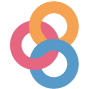' align='center'>
    </a>
    <a href='https://github.com/vopani/fortyone/blob/main/notebooks/automl/tabular/H2O%20AutoML.ipynb'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20GitHub&labelColor=grey&color=blue&logo=github' align='center'>
    </a>
</center>

<center>
    <hr>
    <font size='7'>H2O AutoML</font>
    <br>
    <img src='https://docs.h2o.ai/h2o/latest-stable/h2o-docs/_images/h2o-automl-logo.jpg' width='150px' align='center'>
    <br>
    <a href="https://www.h2o.ai/products/h2o-automl/">H2O AutoML</a> is an automated machine learning library open sourced by <a href="https://h2o.ai">H2O.ai</a>
</center>

## Tutorial Dependencies
In order to get the full experience of this notebook, please install the following dependencies and follow the notebook in order.

* **Scikit-learn** for ML utilities
* **Pandas** for data utilities

In [ ]:
!pip install scikit-learn==0.24.1
!pip install pandas

## 1. Install H2O AutoML
H2O AutoML is part of the `h2o` library that can be installed with pip.

In [ ]:
!pip install h2o

## 2. Upgrade H2O library
If you already have the `h2o` library installed, you can easily upgrade it to the latest version.

In [ ]:
!pip install h2o --upgrade

## 3. Check H2O version
The version of `H2O AutoML` is same as the version of the `h2o` library.

In [4]:
import h2o

print(h2o.__version__)

3.32.1.1


## 4. Intitialize H2O
Before using any functionality of `h2o`, it must first be initialized.

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.1" 2019-04-16; Java(TM) SE Runtime Environment (build 12.0.1+12); Java HotSpot(TM) 64-Bit Server VM (build 12.0.1+12, mixed mode, sharing)
  Starting server from /Users/rohanrao/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmpb4x4i3xk
  JVM stdout: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmpb4x4i3xk/h2o_rohanrao_started_from_python.out
  JVM stderr: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmpb4x4i3xk/h2o_rohanrao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_rohanrao_59v2lg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


## 5. Shutdown H2O
After completing the use of `h2o`, it can be shutdown.

In [6]:
import time

h2o.cluster().shutdown()

time.sleep(2)

H2O session _sid_94b2 closed.


## 6. Import H2O AutoML
`H2OAutoML` is the primary class for running AutoML models.

In [7]:
from h2o.automl import H2OAutoML

## 7. Prepare data
`H2OAutoML` requires the input data as `H2O Frames`. Let's use the breast cancer dataset available in sklearn as an example.

In [8]:
import h2o
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)['data']
data['target'] = load_breast_cancer(as_frame=True)['target']

h2o.init()

h2o_train = h2o.H2OFrame(data)
h2o_train

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.1" 2019-04-16; Java(TM) SE Runtime Environment (build 12.0.1+12); Java HotSpot(TM) 64-Bit Server VM (build 12.0.1+12, mixed mode, sharing)
  Starting server from /Users/rohanrao/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmpxlnpg70o
  JVM stdout: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmpxlnpg70o/h2o_rohanrao_started_from_python.out
  JVM stderr: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmpxlnpg70o/h2o_rohanrao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_rohanrao_tq71cc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0
19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,0
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,0
12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,0
18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,0
13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,0
12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075,0


## 8. Run a binary classification
The target variable needs to be a `factor` for AutoML to run a classifier.   
***P.S.*** *The runtime is limited to 60 seconds and nfolds is set to 0 for faster training*

In [9]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)['data']
data['target'] = load_breast_cancer(as_frame=True)['target']

h2o.init()

h2o_train = h2o.H2OFrame(data)
h2o_train['target'] = h2o_train['target'].asfactor()

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_rohanrao_tq71cc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


## 9. Run multiclass classification
`Multiclass` classification can be run in the same way as binary.

In [10]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_iris

multiclass_data = load_iris(as_frame=True)['data']
multiclass_data['target'] = load_iris(as_frame=True)['target']

h2o.init()

h2o_multiclass_train = h2o.H2OFrame(multiclass_data)
h2o_multiclass_train['target'] = h2o_multiclass_train['target'].asfactor()

h2o_multiclass_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_multiclass_aml.train(y='target', training_frame=h2o_multiclass_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_rohanrao_tq71cc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.976 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |███████████
01:34:41.344: Skipping training of model GBM_5_AutoML_20210428_013429 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210428_013429.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 114.0.


█████████████████████████████████████████████| 100%


## 10. Run regression
`Regression` can be run using the target variable as numeric.

In [11]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_diabetes

regression_data = load_diabetes(as_frame=True)['data']
regression_data['target'] = load_diabetes(as_frame=True)['target']

h2o.init()

h2o_regression_train = h2o.H2OFrame(regression_data)
h2o_regression_train['target'] = h2o_regression_train['target'].asnumeric()

h2o_regression_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_regression_aml.train(y='target', training_frame=h2o_regression_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 59 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_rohanrao_tq71cc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.847 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


## 11. Check the leaderboard
The AutoML `leaderboard` shows you the various models built alongwith their respective performance.

In [12]:
h2o_aml.leaderboard.head(rows=h2o_aml.leaderboard.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__2_AutoML_20210428_013332_model_1,0.995798,0.17832,0.997364,0.0238095,0.134836,0.0181808
XGBoost_grid__1_AutoML_20210428_013332_model_23,0.994398,0.133649,0.996431,0.0238095,0.185134,0.0342745
DeepLearning_1_AutoML_20210428_013332,0.994398,0.0921804,0.996431,0.0238095,0.166589,0.0277518
DeepLearning_grid__1_AutoML_20210428_013332_model_1,0.994398,0.131394,0.996431,0.0238095,0.140977,0.0198745
DeepLearning_grid__3_AutoML_20210428_013332_model_1,0.994398,0.410827,0.996431,0.0238095,0.134846,0.0181835
XGBoost_grid__1_AutoML_20210428_013332_model_50,0.994398,0.133544,0.996431,0.0238095,0.178748,0.0319509
XGBoost_grid__1_AutoML_20210428_013332_model_37,0.993697,0.139459,0.995946,0.0238095,0.186893,0.034929
GLM_1_AutoML_20210428_013332,0.992997,0.0727222,0.995466,0.0238095,0.144011,0.0207392
GBM_grid__1_AutoML_20210428_013332_model_22,0.992997,0.130983,0.995466,0.0238095,0.175381,0.0307584
GBM_grid__1_AutoML_20210428_013332_model_13,0.992997,0.147523,0.995466,0.0238095,0.194756,0.0379298


## 12. Get the best model
The best model is saved as the `leader`.

In [13]:
h2o_aml.leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__2_AutoML_20210428_013332_model_1


Status of Neuron Layers: predicting target, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,082 weights/biases, 22.5 KB, 4,590 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,15,,,,,,,,,
1,,2,20,RectifierDropout,40,0,0,0.00540079,0.00509861,0,-0.00146339,0.20258,0.500722,0.0861356
2,,3,20,RectifierDropout,40,0,0,0.00466611,0.00672252,0,-0.0217442,0.227,0.896867,0.0697859
3,,4,2,Softmax,,0,0,0.00327778,0.00161507,0,0.0384016,1.09003,-0.00237478,0.0343684




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.03068611500052418
RMSE: 0.1751745272593141
LogLoss: 0.12105123441760429
Mean Per-Class Error: 0.029128014842300542
AUC: 0.9911358482787054
AUCPR: 0.9943779096872986
Gini: 0.9822716965574108

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4088237118693218: 


,,0,1,Error,Rate
0,0,161.0,4.0,0.0242,(4.0/165.0)
1,1,10.0,284.0,0.034,(10.0/294.0)
2,Total,171.0,288.0,0.0305,(14.0/459.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,4.088237e-01,0.975945,272.0
1,max f2,4.905253e-02,0.981246,301.0
2,max f0point5,5.559830e-01,0.983264,269.0
3,max accuracy,4.088237e-01,0.969499,272.0
4,max precision,9.999972e-01,1.000000,0.0
5,max recall,1.200808e-02,1.000000,312.0
6,max specificity,9.999972e-01,1.000000,0.0
7,max absolute_mcc,4.088237e-01,0.934661,272.0
8,max min_per_class_accuracy,4.088237e-01,0.965986,272.0
9,max mean_per_class_accuracy,4.088237e-01,0.970872,272.0



Gains/Lift Table: Avg response rate: 64.05 %, avg score: 62.23 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010893,9.999940e-01,1.561224,1.561224,1.000000,9.999957e-01,1.000000,0.999996,0.017007,0.017007,56.122449,56.122449,0.017007
1,2,0.021786,9.999900e-01,1.561224,1.561224,1.000000,9.999911e-01,1.000000,0.999993,0.017007,0.034014,56.122449,56.122449,0.034014
2,3,0.030501,9.999866e-01,1.561224,1.561224,1.000000,9.999890e-01,1.000000,0.999992,0.013605,0.047619,56.122449,56.122449,0.047619
3,4,0.041394,9.999817e-01,1.561224,1.561224,1.000000,9.999842e-01,1.000000,0.999990,0.017007,0.064626,56.122449,56.122449,0.064626
4,5,0.050109,9.999732e-01,1.561224,1.561224,1.000000,9.999774e-01,1.000000,0.999988,0.013605,0.078231,56.122449,56.122449,0.078231
5,6,0.100218,9.999540e-01,1.561224,1.561224,1.000000,9.999635e-01,1.000000,0.999976,0.078231,0.156463,56.122449,56.122449,0.156463
6,7,0.150327,9.999280e-01,1.561224,1.561224,1.000000,9.999432e-01,1.000000,0.999965,0.078231,0.234694,56.122449,56.122449,0.234694
7,8,0.200436,9.998998e-01,1.561224,1.561224,1.000000,9.999121e-01,1.000000,0.999952,0.078231,0.312925,56.122449,56.122449,0.312925
8,9,0.300654,9.997719e-01,1.561224,1.561224,1.000000,9.998448e-01,1.000000,0.999916,0.156463,0.469388,56.122449,56.122449,0.469388
9,10,0.400871,9.993788e-01,1.527285,1.552740,0.978261,9.996062e-01,0.994565,0.999839,0.153061,0.622449,52.728483,55.273957,0.616388




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.041436819935188406
RMSE: 0.20356035943962272
LogLoss: 0.14407852075597366
Mean Per-Class Error: 0.019230769230769162
AUC: 0.9920424403183024
AUCPR: 0.9923053947822686
Gini: 0.9840848806366047

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21839105132286385: 


,,0,1,Error,Rate
0,0,25.0,1.0,0.0385,(1.0/26.0)
1,1,0.0,29.0,0.0,(0.0/29.0)
2,Total,25.0,30.0,0.0182,(1.0/55.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.183911e-01,0.983051,29.0
1,max f2,2.183911e-01,0.993151,29.0
2,max f0point5,2.183911e-01,0.973154,29.0
3,max accuracy,2.183911e-01,0.981818,29.0
4,max precision,9.999978e-01,1.000000,0.0
5,max recall,2.183911e-01,1.000000,29.0
6,max specificity,9.999978e-01,1.000000,0.0
7,max absolute_mcc,2.183911e-01,0.964099,29.0
8,max min_per_class_accuracy,4.849696e-01,0.961538,28.0
9,max mean_per_class_accuracy,2.183911e-01,0.980769,29.0



Gains/Lift Table: Avg response rate: 52.73 %, avg score: 50.39 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018182,9.999843e-01,1.896552,1.896552,1.000000,9.999978e-01,1.000000,0.999998,0.034483,0.034483,89.655172,89.655172,0.034483
1,2,0.036364,9.999724e-01,1.896552,1.896552,1.000000,9.999728e-01,1.000000,0.999985,0.034483,0.068966,89.655172,89.655172,0.068966
2,3,0.036364,9.999699e-01,0.000000,1.896552,0.000000,0.000000e+00,1.000000,0.999985,0.000000,0.068966,-100.000000,89.655172,0.068966
3,4,0.054545,9.999656e-01,1.896552,1.896552,1.000000,9.999682e-01,1.000000,0.999980,0.034483,0.103448,89.655172,89.655172,0.103448
4,5,0.054545,9.999566e-01,0.000000,1.896552,0.000000,0.000000e+00,1.000000,0.999980,0.000000,0.103448,-100.000000,89.655172,0.103448
5,6,0.109091,9.999051e-01,1.896552,1.896552,1.000000,9.999348e-01,1.000000,0.999957,0.103448,0.206897,89.655172,89.655172,0.206897
6,7,0.163636,9.998845e-01,1.896552,1.896552,1.000000,9.998970e-01,1.000000,0.999937,0.103448,0.310345,89.655172,89.655172,0.310345
7,8,0.200000,9.997975e-01,1.896552,1.896552,1.000000,9.998664e-01,1.000000,0.999924,0.068966,0.379310,89.655172,89.655172,0.379310
8,9,0.309091,9.993801e-01,1.896552,1.896552,1.000000,9.996245e-01,1.000000,0.999818,0.206897,0.586207,89.655172,89.655172,0.586207
9,10,0.400000,9.953267e-01,1.896552,1.896552,1.000000,9.980908e-01,1.000000,0.999426,0.172414,0.758621,89.655172,89.655172,0.758621




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-04-28 01:34:22,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-04-28 01:34:22,0.244 sec,85000 obs/sec,10.0,1,4590.0,0.175175,0.121051,0.866729,...,0.994378,1.561224,0.030501,0.20356,0.144079,0.833758,0.992042,0.992305,1.896552,0.018182



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mean concave points,1.000000,1.000000,0.048459
1,worst perimeter,0.921964,0.921964,0.044677
2,worst radius,0.852885,0.852885,0.041330
3,worst compactness,0.836189,0.836189,0.040521
4,compactness error,0.819610,0.819610,0.039717
5,mean perimeter,0.783982,0.783982,0.037991
6,mean texture,0.781641,0.781641,0.037877
7,worst texture,0.781237,0.781237,0.037858
8,mean radius,0.764811,0.764811,0.037062
9,worst concave points,0.757380,0.757380,0.036702



See the whole table with table.as_data_frame()


## 13. Get any model
Any of the built models can be extracted and explored using it's `model_id`.

In [14]:
model_id = h2o_aml.leaderboard.as_data_frame().model_id[4]
print(f'Model: {model_id}')

h2o.get_model(model_id)

Model: DeepLearning_grid__3_AutoML_20210428_013332_model_1
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__3_AutoML_20210428_013332_model_1


Status of Neuron Layers: predicting target, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,502 weights/biases, 28.3 KB, 4,590 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,10,,,,,,,,,
1,,2,20,RectifierDropout,10,0,0,0.0309635,0.0235387,0,-0.0145513,0.214663,0.422166,0.0863498
2,,3,20,RectifierDropout,10,0,0,0.0209561,0.0133899,0,-0.0244885,0.232233,0.94588,0.092232
3,,4,20,RectifierDropout,10,0,0,0.0217259,0.0351602,0,-0.0364378,0.224734,0.962365,0.0458003
4,,5,2,Softmax,,0,0,0.0222947,0.01213,0,-0.0640189,1.19185,0.000311205,0.0455468




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.022381075650360405
RMSE: 0.14960306029744314
LogLoss: 0.09406970280811706
Mean Per-Class Error: 0.01382189239332099
AUC: 0.9988868274582561
AUCPR: 0.9993630861618861
Gini: 0.9977736549165122

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9248325560713608: 


,,0,1,Error,Rate
0,0,160.0,5.0,0.0303,(5.0/165.0)
1,1,0.0,294.0,0.0,(0.0/294.0)
2,Total,160.0,299.0,0.0109,(5.0/459.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.248326e-01,0.991568,249.0
1,max f2,9.248326e-01,0.996610,249.0
2,max f0point5,9.979174e-01,0.990960,236.0
3,max accuracy,9.628802e-01,0.989107,247.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.248326e-01,1.000000,249.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.248326e-01,0.976464,249.0
8,max min_per_class_accuracy,9.961600e-01,0.975758,241.0
9,max mean_per_class_accuracy,9.628802e-01,0.986178,247.0



Gains/Lift Table: Avg response rate: 64.05 %, avg score: 66.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010893,9.999999e-01,1.561224,1.561224,1.000000,1.000000e+00,1.000000,1.000000,0.017007,0.017007,56.122449,56.122449,0.017007
1,2,0.021786,9.999998e-01,1.561224,1.561224,1.000000,9.999998e-01,1.000000,1.000000,0.017007,0.034014,56.122449,56.122449,0.034014
2,3,0.030501,9.999996e-01,1.561224,1.561224,1.000000,9.999997e-01,1.000000,1.000000,0.013605,0.047619,56.122449,56.122449,0.047619
3,4,0.041394,9.999993e-01,1.561224,1.561224,1.000000,9.999994e-01,1.000000,1.000000,0.017007,0.064626,56.122449,56.122449,0.064626
4,5,0.050109,9.999991e-01,1.561224,1.561224,1.000000,9.999992e-01,1.000000,1.000000,0.013605,0.078231,56.122449,56.122449,0.078231
5,6,0.100218,9.999973e-01,1.561224,1.561224,1.000000,9.999983e-01,1.000000,0.999999,0.078231,0.156463,56.122449,56.122449,0.156463
6,7,0.150327,9.999962e-01,1.561224,1.561224,1.000000,9.999966e-01,1.000000,0.999998,0.078231,0.234694,56.122449,56.122449,0.234694
7,8,0.200436,9.999932e-01,1.561224,1.561224,1.000000,9.999948e-01,1.000000,0.999997,0.078231,0.312925,56.122449,56.122449,0.312925
8,9,0.300654,9.999831e-01,1.561224,1.561224,1.000000,9.999894e-01,1.000000,0.999995,0.156463,0.469388,56.122449,56.122449,0.469388
9,10,0.400871,9.999641e-01,1.561224,1.561224,1.000000,9.999730e-01,1.000000,0.999989,0.156463,0.625850,56.122449,56.122449,0.625850




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0021041394494743736
RMSE: 0.04587089981103896
LogLoss: 0.011753099509217647
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8133635982812183: 


,,0,1,Error,Rate
0,0,26.0,0.0,0.0,(0.0/26.0)
1,1,0.0,29.0,0.0,(0.0/29.0)
2,Total,26.0,29.0,0.0,(0.0/55.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,8.133636e-01,1.000000,28.0
1,max f2,8.133636e-01,1.000000,28.0
2,max f0point5,8.133636e-01,1.000000,28.0
3,max accuracy,8.133636e-01,1.000000,28.0
4,max precision,9.999995e-01,1.000000,0.0
5,max recall,8.133636e-01,1.000000,28.0
6,max specificity,9.999995e-01,1.000000,0.0
7,max absolute_mcc,8.133636e-01,1.000000,28.0
8,max min_per_class_accuracy,8.133636e-01,1.000000,28.0
9,max mean_per_class_accuracy,8.133636e-01,1.000000,28.0



Gains/Lift Table: Avg response rate: 52.73 %, avg score: 53.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018182,9.999993e-01,1.896552,1.896552,1.0,9.999995e-01,1.000000,0.999999,0.034483,0.034483,89.655172,89.655172,0.034483
1,2,0.036364,9.999991e-01,1.896552,1.896552,1.0,9.999991e-01,1.000000,0.999999,0.034483,0.068966,89.655172,89.655172,0.068966
2,3,0.036364,9.999991e-01,0.000000,1.896552,0.0,0.000000e+00,1.000000,0.999999,0.000000,0.068966,-100.000000,89.655172,0.068966
3,4,0.054545,9.999990e-01,1.896552,1.896552,1.0,9.999991e-01,1.000000,0.999999,0.034483,0.103448,89.655172,89.655172,0.103448
4,5,0.054545,9.999987e-01,0.000000,1.896552,0.0,0.000000e+00,1.000000,0.999999,0.000000,0.103448,-100.000000,89.655172,0.103448
5,6,0.109091,9.999956e-01,1.896552,1.896552,1.0,9.999970e-01,1.000000,0.999998,0.103448,0.206897,89.655172,89.655172,0.206897
6,7,0.163636,9.999930e-01,1.896552,1.896552,1.0,9.999940e-01,1.000000,0.999997,0.103448,0.310345,89.655172,89.655172,0.310345
7,8,0.200000,9.999925e-01,1.896552,1.896552,1.0,9.999926e-01,1.000000,0.999996,0.068966,0.379310,89.655172,89.655172,0.379310
8,9,0.309091,9.999868e-01,1.896552,1.896552,1.0,9.999902e-01,1.000000,0.999994,0.206897,0.586207,89.655172,89.655172,0.586207
9,10,0.400000,9.999488e-01,1.896552,1.896552,1.0,9.999699e-01,1.000000,0.999988,0.172414,0.758621,89.655172,89.655172,0.758621




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-04-28 01:34:25,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-04-28 01:34:25,0.119 sec,106744 obs/sec,10.0,1,4590.0,0.149603,0.09407,0.902798,...,0.999363,1.561224,0.010893,0.045871,0.011753,0.991558,1.0,1.0,1.896552,0.0



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,worst perimeter,1.000000,1.000000,0.050689
1,mean texture,0.857596,0.857596,0.043471
2,mean concave points,0.854906,0.854906,0.043335
3,worst smoothness,0.721210,0.721210,0.036558
4,mean symmetry,0.716277,0.716277,0.036308
5,worst radius,0.703132,0.703132,0.035641
6,worst concave points,0.700160,0.700160,0.035491
7,worst texture,0.692122,0.692122,0.035083
8,mean compactness,0.689968,0.689968,0.034974
9,worst fractal dimension,0.689476,0.689476,0.034949



See the whole table with table.as_data_frame()


## 14. Use validation split
A separate `validation dataset` can be provided during training. Let's split the dataset into train-valid using 80-20 split.

In [15]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data, train_size=0.8, random_state=41)
print(f'Train Data shape: {train.shape}')
print(f'Valid Data shape: {valid.shape}')

h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

h2o_train['target'] = h2o_train['target'].asfactor()

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train, validation_frame=h2o_valid)
h2o_aml.leaderboard

Train Data shape: (455, 31)
Valid Data shape: (114, 31)
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210428_013618_model_13,1,0.0827401,1,0,0.160666,0.0258137
XGBoost_grid__1_AutoML_20210428_013618_model_43,1,0.0921994,1,0,0.146147,0.0213589
XGBoost_grid__1_AutoML_20210428_013618_model_87,1,0.149643,1,0,0.186604,0.0348211
GBM_grid__1_AutoML_20210428_013618_model_3,1,0.143102,1,0,0.188837,0.0356594
GBM_3_AutoML_20210428_013618,1,0.113674,1,0,0.184795,0.0341491
GBM_grid__1_AutoML_20210428_013618_model_9,1,0.0963895,1,0,0.184501,0.0340404
GBM_grid__1_AutoML_20210428_013618_model_2,1,0.167117,1,0,0.176154,0.0310304
GBM_grid__1_AutoML_20210428_013618_model_11,1,0.206552,1,0,0.226157,0.0511471
GBM_4_AutoML_20210428_013618,0.998051,0.10725,0.998653,0.0263158,0.160238,0.0256763
GBM_grid__1_AutoML_20210428_013618_model_5,0.998051,0.108183,0.998653,0.0263158,0.181695,0.0330129


## 15. Use cross-validation
Running cross validation during training is inbuilt using `nfolds`.

In [16]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=3)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__2_AutoML_20210428_013717_model_3,0.993724,0.117598,0.995547,0.0279296,0.144884,0.0209913
StackedEnsemble_BestOfFamily_AutoML_20210428_013717,0.992686,0.0901898,0.994409,0.0279296,0.152247,0.0231791
GLM_1_AutoML_20210428_013717,0.99133,0.100519,0.993181,0.0314631,0.162786,0.0264991
DeepLearning_grid__1_AutoML_20210428_013717_model_3,0.991289,0.116609,0.993733,0.0379037,0.173157,0.0299832
DeepLearning_grid__1_AutoML_20210428_013717_model_1,0.990848,0.202371,0.991322,0.0385303,0.180583,0.0326103
DeepLearning_grid__3_AutoML_20210428_013717_model_1,0.990426,0.185883,0.989014,0.0338565,0.176143,0.0310264
GBM_3_AutoML_20210428_013717,0.989903,0.127884,0.993133,0.0506718,0.183459,0.0336572
DeepLearning_grid__1_AutoML_20210428_013717_model_4,0.989358,0.140718,0.990704,0.0442312,0.179447,0.0322011
GBM_2_AutoML_20210428_013717,0.989297,0.129365,0.992637,0.0426904,0.186797,0.0348931
DeepLearning_grid__3_AutoML_20210428_013717_model_2,0.989184,0.161062,0.992977,0.0478778,0.211312,0.0446526


## 16. Use customized folds for cross-validation
You can provide a `fold column` to customize the folds for cross-validation.

In [17]:
import random

h2o_train['fold_col'] = h2o.H2OFrame([random.randint(0, 2) for i in range(h2o_train.nrows)])

h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train, fold_column='fold_col')
h2o_aml.leaderboard

h2o_train = h2o_train.drop('fold_col')

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
01:38:15.474: Fold column fold_col will be used for cross-validation. nfolds parameter will be ignored.

████████████████████████████████████████████████████████| 100%


## 17. Get the cross-validation predictions
The cross validation predictions can be extracted by enabling the `keep_cross_validation` settings.

In [18]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=3,
                    keep_cross_validation_fold_assignment=True, keep_cross_validation_predictions=True)
h2o_aml.train(y='target', training_frame=h2o_train)

cv_preds = h2o_aml.leader.cross_validation_predictions()[0].as_data_frame()

for df in h2o_aml.leader.cross_validation_predictions()[1:]:
    cv_preds += cv_preds + df.as_data_frame()

h2o_train['fold'] = h2o_aml.leader.cross_validation_fold_assignment()
h2o_train = h2o_train.cbind(h2o.H2OFrame(cv_preds))
h2o_train

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,fold,predict,p0,p1
12.83,15.73,82.89,506.9,0.0904,0.08269,0.05835,0.03078,0.1705,0.05913,0.1499,0.4875,1.195,11.64,0.004873,0.01796,0.03318,0.00836,0.01601,0.002289,14.09,19.35,93.22,605.8,0.1326,0.261,0.3476,0.09783,0.3006,0.07802,1,0,4,1.90621e-10,4
14.26,18.17,91.22,633.1,0.06576,0.0522,0.02475,0.01374,0.1635,0.05586,0.23,0.669,1.661,20.56,0.003169,0.01377,0.01079,0.005243,0.01103,0.001957,16.22,25.26,105.8,819.7,0.09445,0.2167,0.1565,0.0753,0.2636,0.07676,1,1,2,5.53699e-05,1.99994
13.65,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.136,0.06344,0.2102,0.4336,1.391,17.4,0.004133,0.01695,0.01652,0.006659,0.01371,0.002735,15.34,16.35,99.71,706.2,0.1311,0.2474,0.1759,0.08056,0.238,0.08718,1,2,1,1.15686e-07,1
10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,0.5196,1.918,3.564,33,0.008263,0.0187,0.01277,0.005917,0.02466,0.002977,13.03,31.45,83.9,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626,1,0,4,1.18533e-07,4
20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124,0,1,0,2,1.4832e-20
10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,0.06031,0.1753,1.027,1.267,11.09,0.003478,0.01221,0.01072,0.009393,0.02941,0.003428,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643,1,2,1,4.79064e-12,1
14.45,20.22,94.49,642.7,0.09872,0.1206,0.118,0.0598,0.195,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.01597,0.02,0.007303,0.01522,0.001976,18.33,30.12,117.9,1044,0.1552,0.4056,0.4967,0.1838,0.4753,0.1013,0,0,0,3.99992,7.9797e-05
11.52,14.93,73.87,406.3,0.1013,0.07808,0.04328,0.02929,0.1883,0.06168,0.2562,1.038,1.686,18.62,0.006662,0.01228,0.02105,0.01006,0.01677,0.002784,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,1,1,2,1.08464e-06,2
13.49,22.3,86.91,561,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.353,1.735,20.2,0.004455,0.01382,0.02095,0.01184,0.01641,0.001956,15.15,31.82,99,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917,1,2,1,0.00514859,0.994851
18.65,17.6,123.7,1076,0.1099,0.1686,0.1974,0.1009,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.006294,0.03994,0.05554,0.01695,0.02428,0.003535,22.82,21.32,150.6,1567,0.1679,0.509,0.7345,0.2378,0.3799,0.09185,0,0,0,4,9.44392e-11


## 18. Add sample weights
Weights for samples / observations can be included as a `weights_column`.

In [19]:
import random

h2o_train = h2o.H2OFrame(train)
h2o_train['target'] = h2o_train['target'].asfactor()

h2o_train['weight_col'] = h2o.H2OFrame([random.random() for i in range(h2o_train.nrows)])

h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train, weights_column='weight_col')
h2o_aml.leaderboard

h2o_train = h2o_train.drop('weight_col')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |██████████████
01:40:34.889: GBM_5_AutoML_20210428_014017 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210428_014017.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 183.56940502818105.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 176.16440250315193.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 175.29471071143334.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows,

## 19. Check models used in Stacked Ensemble
The StackedEnsemble models are an inbuilt ensemble of multiple base models. The models and weights can be extracted using the model metalearner's `coef_norm` attribute.

In [20]:
h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_1_AutoML_20210428_014119,0.992953,0.0903967,0.995168,0.0315761,0.156857,0.0246042
DeepLearning_grid__1_AutoML_20210428_014119_model_2,0.991885,0.112445,0.994063,0.0366505,0.153758,0.0236415
StackedEnsemble_BestOfFamily_AutoML_20210428_014119,0.991741,0.0928091,0.994029,0.0372771,0.156936,0.0246288
DeepLearning_grid__2_AutoML_20210428_014119_model_1,0.991618,0.147355,0.994048,0.0332299,0.164722,0.0271333
GLM_1_AutoML_20210428_014119,0.990344,0.103951,0.992386,0.0314631,0.163797,0.0268294
DeepLearning_grid__1_AutoML_20210428_014119_model_3,0.990324,0.128249,0.991763,0.0326033,0.160595,0.0257908
GBM_grid__1_AutoML_20210428_014119_model_4,0.990262,0.117943,0.993404,0.0391569,0.177589,0.0315379
DeepLearning_grid__3_AutoML_20210428_014119_model_2,0.989122,0.215252,0.992059,0.0448578,0.201537,0.040617
GBM_3_AutoML_20210428_014119,0.988331,0.124869,0.991975,0.0506718,0.183835,0.0337953
DeepLearning_grid__2_AutoML_20210428_014119_model_3,0.988249,0.141714,0.99073,0.0506718,0.17959,0.0322526


In [21]:
stacked_ensemble_model_id = [x for x in h2o_aml.leaderboard.as_data_frame().model_id if 'StackedEnsemble' in x][0]
stacked_ensemble_model = h2o.get_model(stacked_ensemble_model_id)
stacked_ensemble_model.metalearner().coef_norm()

{'Intercept': 0.5950855782191072,
 'DeepLearning_1_AutoML_20210428_014119': 3.818438727657504,
 'GLM_1_AutoML_20210428_014119': 1.212258605231609,
 'GBM_grid__1_AutoML_20210428_014119_model_4': 1.4541656333609978,
 'XGBoost_grid__1_AutoML_20210428_014119_model_9': 0.0,
 'DRF_1_AutoML_20210428_014119': 0.0,
 'XRT_1_AutoML_20210428_014119': 0.0}

## 20. Disable StackedEnsemble
StackedEnsemble can be disabled using `exclude_algos` but will likely lead to suboptimal results.

In [22]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['StackedEnsemble'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20210428_014220_model_17,1,0.151171,1,0,0.200776,0.0403108
XGBoost_2_AutoML_20210428_014220,1,0.18705,1,0,0.218951,0.0479394
GBM_grid__1_AutoML_20210428_014220_model_11,1,0.0851905,1,0,0.165192,0.0272884
DRF_1_AutoML_20210428_014220,0.999025,0.127672,0.999322,0.0263158,0.19383,0.0375701
GLM_1_AutoML_20210428_014220,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210428_014220_model_5,0.998051,0.0955872,0.998653,0.0263158,0.169168,0.0286177
GBM_grid__1_AutoML_20210428_014220_model_18,0.998051,0.109972,0.998653,0.0263158,0.179509,0.0322233
GBM_grid__1_AutoML_20210428_014220_model_2,0.998051,0.142937,0.998653,0.0263158,0.208154,0.043328
DeepLearning_grid__2_AutoML_20210428_014220_model_1,0.998051,0.145205,0.998653,0.0263158,0.172832,0.0298708
GBM_2_AutoML_20210428_014220,0.998051,0.10899,0.998653,0.0263158,0.179881,0.0323573


## 21. Set limits to training
The default maximum runtime is 1 hour but it is recommended to use `max_runtime_secs` and `max_models` to set your own runtimes.

In [23]:
# setting max_runtime_secs
h2o_aml = H2OAutoML(max_runtime_secs=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_20210428_014322,1,0.116049,1,0,0.1891,0.0357587
GBM_grid__1_AutoML_20210428_014322_model_1,1,0.0878659,1,0,0.163172,0.0266249
GBM_grid__1_AutoML_20210428_014322_model_11,0.998051,0.102913,0.998653,0.0263158,0.170453,0.0290543
GBM_grid__1_AutoML_20210428_014322_model_6,0.998051,0.106432,0.998653,0.0263158,0.157283,0.0247378
XGBoost_grid__1_AutoML_20210428_014322_model_44,0.998051,0.155171,0.998653,0.0263158,0.202258,0.0409082
GBM_2_AutoML_20210428_014322,0.998051,0.113667,0.998653,0.0263158,0.180595,0.0326146
GBM_grid__1_AutoML_20210428_014322_model_8,0.998051,0.112345,0.998653,0.0263158,0.192461,0.0370414
GBM_4_AutoML_20210428_014322,0.998051,0.112885,0.998653,0.0263158,0.195675,0.0382887
GLM_1_AutoML_20210428_014322,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
XGBoost_grid__1_AutoML_20210428_014322_model_15,0.997076,0.180466,0.99795,0.0263158,0.214738,0.0461123


In [24]:
# setting max_models
h2o_aml = H2OAutoML(max_models=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210428_014403_model_7,1,0.129831,1,0,0.202078,0.0408357
DeepLearning_grid__1_AutoML_20210428_014403_model_2,0.998051,0.0948889,0.998653,0.0263158,0.175823,0.0309138
GBM_2_AutoML_20210428_014403,0.998051,0.141341,0.998653,0.0263158,0.21709,0.0471279
GLM_1_AutoML_20210428_014403,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__1_AutoML_20210428_014403_model_1,0.998051,0.0558113,0.998653,0.0263158,0.138728,0.0192455
XGBoost_1_AutoML_20210428_014403,0.998051,0.114153,0.998653,0.0263158,0.17634,0.031096
DeepLearning_grid__3_AutoML_20210428_014403_model_1,0.998051,0.108093,0.998653,0.0263158,0.184007,0.0338586
GBM_3_AutoML_20210428_014403,0.998051,0.132393,0.998653,0.0263158,0.202086,0.0408386
GBM_grid__1_AutoML_20210428_014403_model_3,0.998051,0.0958094,0.998653,0.0263158,0.170022,0.0289075
GBM_grid__1_AutoML_20210428_014403_model_1,0.996101,0.145941,0.997255,0.0263158,0.216633,0.0469299


In [25]:
# setting max_runtime_secs and max_models
h2o_aml = H2OAutoML(max_runtime_secs=41, max_models=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__3_AutoML_20210428_014552_model_1,0.998051,0.217461,0.998653,0.0263158,0.205504,0.0422317
GLM_1_AutoML_20210428_014552,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_3_AutoML_20210428_014552,0.998051,0.107378,0.998653,0.0263158,0.176559,0.031173
GBM_1_AutoML_20210428_014552,0.998051,0.130174,0.998653,0.0263158,0.189577,0.0359393
XGBoost_1_AutoML_20210428_014552,0.998051,0.127795,0.998653,0.0263158,0.19209,0.0368984
GBM_4_AutoML_20210428_014552,0.998051,0.0965242,0.998653,0.0263158,0.166798,0.0278215
XGBoost_grid__1_AutoML_20210428_014552_model_6,0.998051,0.0967906,0.998653,0.0263158,0.162611,0.0264424
XGBoost_grid__1_AutoML_20210428_014552_model_1,0.996101,0.133539,0.997401,0.0185185,0.198232,0.0392959
GBM_grid__1_AutoML_20210428_014552_model_8,0.996101,0.132896,0.997255,0.0263158,0.197053,0.0388298
GBM_2_AutoML_20210428_014552,0.996101,0.119731,0.997255,0.0263158,0.181638,0.0329924


## 22. Choose evaluation metric
The default metrics are `logloss` for classification and `deviance` for regression and can be replaced with any of the [supported list of metrics](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/stopping_metric.html).

In [26]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    stopping_metric='AUC', sort_metric='AUC')
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20210428_014632,0.998051,0.131213,0.998653,0.0263158,0.194647,0.0378874
GLM_1_AutoML_20210428_014632,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210428_014632_model_7,0.998051,0.143447,0.998653,0.0263158,0.203744,0.0415118
XRT_1_AutoML_20210428_014632,0.997076,0.147539,0.998023,0.0185185,0.217439,0.0472796
DeepLearning_grid__3_AutoML_20210428_014632_model_2,0.996101,0.237014,0.997401,0.0185185,0.205795,0.0423514
XGBoost_grid__1_AutoML_20210428_014632_model_7,0.996101,0.165039,0.997255,0.0263158,0.215717,0.0465337
DeepLearning_grid__2_AutoML_20210428_014632_model_2,0.996101,0.347828,0.997401,0.0185185,0.208435,0.0434451
XGBoost_1_AutoML_20210428_014632,0.996101,0.125098,0.997255,0.0263158,0.186081,0.0346261
GBM_4_AutoML_20210428_014632,0.996101,0.158402,0.997255,0.0263158,0.215178,0.0463017
GBM_grid__1_AutoML_20210428_014632_model_2,0.994152,0.169102,0.995803,0.0263158,0.220037,0.0484162


## 23. Use early stopping
Early `stopping` can be used to control overfitting and reduce training time.

In [27]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    stopping_metric='AUC', stopping_tolerance=0.05, stopping_rounds=5)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_20210428_014723,1,0.128436,1,0,0.207315,0.0429794
XGBoost_grid__1_AutoML_20210428_014723_model_3,0.999025,0.167458,0.999322,0.0263158,0.195458,0.0382037
GBM_3_AutoML_20210428_014723,0.998051,0.112438,0.998653,0.0263158,0.180211,0.0324759
GBM_grid__1_AutoML_20210428_014723_model_6,0.998051,0.0897725,0.998653,0.0263158,0.161943,0.0262256
GBM_1_AutoML_20210428_014723,0.998051,0.104632,0.998653,0.0263158,0.185905,0.0345607
GBM_grid__1_AutoML_20210428_014723_model_7,0.998051,0.122239,0.998653,0.0263158,0.20721,0.0429361
GLM_1_AutoML_20210428_014723,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_2_AutoML_20210428_014723,0.996101,0.104142,0.997255,0.0263158,0.173779,0.0301991
GBM_grid__1_AutoML_20210428_014723_model_1,0.996101,0.127868,0.997255,0.0263158,0.199641,0.0398564
GBM_grid__1_AutoML_20210428_014723_model_4,0.996101,0.147893,0.997255,0.0263158,0.220949,0.0488185


## 24. Enable training of only certain type of models
You can provide the list of model types to include in training using `include_algos`.

In [28]:
# training only linear models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['GLM'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210428_014813,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138


In [29]:
# training only boosting models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['GBM', 'XGBoost'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20210428_014816,1,0.0984023,1,0,0.17343,0.0300779
GBM_4_AutoML_20210428_014816,1,0.087404,1,0,0.16373,0.0268076
GBM_grid__1_AutoML_20210428_014816_model_8,1,0.117506,1,0,0.199902,0.039961
GBM_2_AutoML_20210428_014816,0.998051,0.126498,0.998653,0.0263158,0.192599,0.0370945
XGBoost_grid__1_AutoML_20210428_014816_model_7,0.996101,0.127655,0.997255,0.0263158,0.192791,0.0371682
GBM_1_AutoML_20210428_014816,0.996101,0.121685,0.997401,0.0185185,0.195062,0.038049
XGBoost_grid__1_AutoML_20210428_014816_model_12,0.996101,0.174329,0.997401,0.0185185,0.216367,0.0468147
XGBoost_2_AutoML_20210428_014816,0.996101,0.18426,0.997401,0.0185185,0.217819,0.0474453
GBM_grid__1_AutoML_20210428_014816_model_6,0.996101,0.122505,0.997255,0.0263158,0.201215,0.0404874
GBM_grid__1_AutoML_20210428_014816_model_3,0.994152,0.136255,0.995803,0.0263158,0.195794,0.0383353


In [30]:
# training only deep learning models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['DeepLearning'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__2_AutoML_20210428_014835_model_1,0.998051,0.187251,0.998653,0.0263158,0.175351,0.0307478
DeepLearning_grid__3_AutoML_20210428_014835_model_1,0.996101,0.213188,0.997255,0.0263158,0.199833,0.0399331
DeepLearning_grid__2_AutoML_20210428_014835_model_2,0.994152,0.0899869,0.996003,0.0526316,0.178689,0.0319299
DeepLearning_grid__3_AutoML_20210428_014835_model_2,0.992203,0.386411,0.99455,0.0526316,0.207048,0.0428689
DeepLearning_grid__1_AutoML_20210428_014835_model_2,0.992203,0.197027,0.994291,0.0263158,0.199425,0.0397705
DeepLearning_grid__2_AutoML_20210428_014835_model_3,0.992203,0.174008,0.995142,0.0185185,0.155965,0.024325
DeepLearning_grid__2_AutoML_20210428_014835_model_4,0.984405,0.709493,0.988648,0.0448343,0.208512,0.0434771
DeepLearning_grid__1_AutoML_20210428_014835_model_3,0.984405,0.925128,0.988093,0.0526316,0.20848,0.0434639
DeepLearning_grid__1_AutoML_20210428_014835_model_1,0.906433,0.389034,0.945322,0.160819,0.363257,0.131955
DeepLearning_1_AutoML_20210428_014835,0.906433,0.370381,0.916631,0.105263,0.335761,0.112735


## 25. Disable training of only certain type of models
You can provide the list of model types to exclude in training using `exclude_algos`.

In [31]:
# training without deep learning models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['DeepLearning'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210428_014938_model_8,1,0.0794143,1,0,0.147194,0.021666
GBM_2_AutoML_20210428_014938,1,0.111762,1,0,0.199526,0.0398108
GBM_grid__1_AutoML_20210428_014938_model_1,1,0.113604,1,0,0.192459,0.0370404
GBM_4_AutoML_20210428_014938,0.998051,0.102251,0.998653,0.0263158,0.164076,0.0269209
GBM_grid__1_AutoML_20210428_014938_model_9,0.998051,0.137042,0.998653,0.0263158,0.211713,0.0448225
GBM_1_AutoML_20210428_014938,0.998051,0.125276,0.998653,0.0263158,0.188601,0.0355703
GBM_3_AutoML_20210428_014938,0.998051,0.114767,0.998653,0.0263158,0.193144,0.0373047
GLM_1_AutoML_20210428_014938,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210428_014938_model_10,0.996101,0.13439,0.997255,0.0263158,0.19787,0.0391524
GBM_grid__1_AutoML_20210428_014938_model_15,0.996101,0.127902,0.997255,0.0263158,0.19836,0.0393467


In [32]:
# training without deep learning models and stacked ensemble
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['DeepLearning', 'StackedEnsemble'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20210428_015003,1,0.122976,1,0,0.200256,0.0401023
GBM_grid__1_AutoML_20210428_015003_model_5,0.998051,0.100758,0.998653,0.0263158,0.170798,0.0291721
GLM_1_AutoML_20210428_015003,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
XGBoost_grid__1_AutoML_20210428_015003_model_9,0.998051,0.171728,0.998653,0.0263158,0.208533,0.043486
XGBoost_3_AutoML_20210428_015003,0.996101,0.12764,0.997255,0.0263158,0.200214,0.0400855
XGBoost_grid__1_AutoML_20210428_015003_model_36,0.996101,0.149927,0.997255,0.0263158,0.20841,0.0434349
GBM_1_AutoML_20210428_015003,0.996101,0.130662,0.997255,0.0263158,0.189823,0.0360329
GBM_2_AutoML_20210428_015003,0.996101,0.106572,0.997255,0.0263158,0.174063,0.0302979
GBM_4_AutoML_20210428_015003,0.996101,0.118485,0.997255,0.0263158,0.185265,0.034323
XGBoost_grid__1_AutoML_20210428_015003_model_50,0.996101,0.116689,0.997255,0.0263158,0.197649,0.0390653


## 26. Handle class inbalance
The oversampling or undersampling on imbalanced datasets can be configured with the `balancing` and `sampling` settings.

In [33]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    balance_classes=True, class_sampling_factors=None, max_after_balance_size=1.5)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████Failed polling AutoML progress log: Unexpected HTTP error: ('Connection aborted.', BadStatusLine('POST /99/Rapids HTTP/1.1\r\n'))
████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_20210428_015058,1,0.120324,1,0,0.194188,0.0377089
GBM_grid__1_AutoML_20210428_015058_model_3,1,0.123752,1,0,0.201683,0.0406762
GBM_grid__1_AutoML_20210428_015058_model_7,1,0.100661,1,0,0.183492,0.0336695
GBM_grid__1_AutoML_20210428_015058_model_5,1,0.133419,1,0,0.208999,0.0436804
XGBoost_grid__1_AutoML_20210428_015058_model_13,0.998051,0.132411,0.998653,0.0263158,0.191269,0.0365839
XRT_1_AutoML_20210428_015058,0.998051,0.155612,0.998653,0.0263158,0.229206,0.0525356
GLM_1_AutoML_20210428_015058,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_3_AutoML_20210428_015058,0.998051,0.130059,0.998653,0.0263158,0.209576,0.0439221
GBM_1_AutoML_20210428_015058,0.998051,0.0794313,0.998653,0.0263158,0.151695,0.0230113
XGBoost_grid__1_AutoML_20210428_015058_model_22,0.996101,0.13463,0.997255,0.0263158,0.198987,0.0395957


## 27. Enforce monotonicity
Every feature can be forced to have a `monotonic constraint` using +1 for increasing and -1 for decreasing. Generally not recommended to use unless it is required since it tends to lower the model's performance.

In [34]:
monotone_constraints={
    'mean radius':1,
    'concavity error': 1,
    'worst radius': -1,
    'worst area': 1
}

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    monotone_constraints=monotone_constraints)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210428_015153,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__3_AutoML_20210428_015153_model_1,0.996101,0.298503,0.997255,0.0263158,0.207726,0.0431499
GBM_2_AutoML_20210428_015153,0.996101,0.116616,0.997255,0.0263158,0.177746,0.0315938
XGBoost_1_AutoML_20210428_015153,0.996101,0.136319,0.997255,0.0263158,0.19909,0.0396369
XRT_1_AutoML_20210428_015153,0.996101,0.135223,0.997255,0.0263158,0.204952,0.0420053
GBM_1_AutoML_20210428_015153,0.996101,0.137176,0.997255,0.0263158,0.202152,0.0408656
GBM_grid__1_AutoML_20210428_015153_model_1,0.996101,0.117472,0.997255,0.0263158,0.178896,0.0320038
GBM_3_AutoML_20210428_015153,0.996101,0.116401,0.997255,0.0263158,0.175798,0.030905
GBM_4_AutoML_20210428_015153,0.994152,0.128973,0.995803,0.0263158,0.18147,0.0329313
XGBoost_grid__1_AutoML_20210428_015153_model_21,0.994152,0.130222,0.995803,0.0263158,0.181899,0.0330871


## 28. Enable target encoding
Target encoding can be automatically applied on categorical features as a `preprocessing` step.

In [35]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    preprocessing=['target_encoding'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20210428_015253_model_6,1,0.166762,1,0,0.204524,0.04183
GBM_4_AutoML_20210428_015253,1,0.102884,1,0,0.179309,0.0321516
XGBoost_grid__1_AutoML_20210428_015253_model_25,0.999025,0.223895,0.999322,0.0263158,0.235408,0.0554169
DeepLearning_grid__3_AutoML_20210428_015253_model_1,0.998051,0.208484,0.998653,0.0263158,0.166195,0.0276207
GBM_1_AutoML_20210428_015253,0.998051,0.117875,0.998653,0.0263158,0.180951,0.0327433
XGBoost_grid__1_AutoML_20210428_015253_model_39,0.998051,0.157071,0.998653,0.0263158,0.206793,0.0427634
GLM_1_AutoML_20210428_015253,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_2_AutoML_20210428_015253,0.998051,0.108939,0.998653,0.0263158,0.175275,0.0307215
DeepLearning_grid__2_AutoML_20210428_015253_model_1,0.998051,0.149654,0.998653,0.0263158,0.199905,0.039962
XGBoost_grid__1_AutoML_20210428_015253_model_34,0.996101,0.158033,0.997401,0.0185185,0.214243,0.0459


## 29. Balance exploitation vs exploration
The `exploitation_ratio` can be set high (>0.8) to fine-tune models (only XGBoost & GBM supported) better or can be set low (<0.2) to build more number of models.

In [36]:
# high exploitation and low exploration
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.9)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_lr_annealing_selection__AutoML_20210428_015353_select_model,1,0.10876,1,0,0.182287,0.0332284
GLM_1_AutoML_20210428_015353,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
XGBoost_lr_search_selection__AutoML_20210428_015353_select_grid_model_1,0.998051,0.130482,0.998653,0.0263158,0.198507,0.0394049
DeepLearning_grid__2_AutoML_20210428_015353_model_1,0.998051,0.146215,0.998653,0.0263158,0.200173,0.0400691
GBM_grid__1_AutoML_20210428_015353_model_1,0.996101,0.119306,0.997255,0.0263158,0.188868,0.0356711
XGBoost_grid__1_AutoML_20210428_015353_model_1,0.996101,0.181173,0.997401,0.0185185,0.219225,0.0480595
GBM_3_AutoML_20210428_015353,0.996101,0.120632,0.997255,0.0263158,0.181033,0.0327729
XGBoost_grid__1_AutoML_20210428_015353_model_5,0.996101,0.165889,0.997255,0.0263158,0.229893,0.052851
DeepLearning_grid__3_AutoML_20210428_015353_model_1,0.994152,0.338699,0.995803,0.0263158,0.206973,0.042838
GBM_4_AutoML_20210428_015353,0.994152,0.15398,0.996003,0.0526316,0.208868,0.0436258


In [37]:
# high exploration and low exploitation
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.13)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_20210428_015426,0.998051,0.137353,0.998653,0.0263158,0.210486,0.0443043
GLM_1_AutoML_20210428_015426,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210428_015426_model_13,0.998051,0.117418,0.998653,0.0263158,0.187852,0.0352885
GBM_2_AutoML_20210428_015426,0.998051,0.108945,0.998653,0.0263158,0.188707,0.0356105
GBM_3_AutoML_20210428_015426,0.998051,0.107575,0.998653,0.0263158,0.183184,0.0335564
DRF_1_AutoML_20210428_015426,0.996101,0.13989,0.997401,0.0185185,0.209321,0.0438154
GBM_4_AutoML_20210428_015426,0.996101,0.125708,0.997255,0.0263158,0.195432,0.0381935
GBM_grid__1_AutoML_20210428_015426_model_12,0.996101,0.143087,0.997255,0.0263158,0.197685,0.0390793
GBM_grid__1_AutoML_20210428_015426_model_14,0.996101,0.129108,0.997255,0.0263158,0.185174,0.0342895
XGBoost_grid__1_AutoML_20210428_015426_model_3,0.996101,0.147231,0.997401,0.0185185,0.208676,0.0435458


In [38]:
# balanced exploitation and exploration
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.41)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_lr_annealing_selection__AutoML_20210428_015526_select_model,1,0.115643,1,0,0.184929,0.0341988
GBM_grid__1_AutoML_20210428_015526_model_5,0.998051,0.10232,0.998653,0.0263158,0.176414,0.0311217
GBM_2_AutoML_20210428_015526,0.998051,0.119035,0.998653,0.0263158,0.189034,0.0357339
GBM_1_AutoML_20210428_015526,0.998051,0.114165,0.998653,0.0263158,0.172855,0.0298789
GBM_3_AutoML_20210428_015526,0.998051,0.102726,0.998653,0.0263158,0.176438,0.0311304
GBM_grid__1_AutoML_20210428_015526_model_9,0.998051,0.114825,0.998653,0.0263158,0.191888,0.036821
GLM_1_AutoML_20210428_015526,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__3_AutoML_20210428_015526_model_1,0.996101,0.198638,0.997255,0.0263158,0.164221,0.0269686
GBM_grid__1_AutoML_20210428_015526_model_8,0.996101,0.12942,0.997255,0.0263158,0.195741,0.0383144
GBM_grid__1_AutoML_20210428_015526_model_10,0.996101,0.143483,0.997255,0.0263158,0.206299,0.0425594


## 30. Make results reproducible
Models can be reproduced with the exact same result on multiple runs by setting a `seed` and disabling deep learning models.   
***P.S.*** *Note that the model_ids will be different across runs*

In [39]:
# without reproducibility
print('Without reproducibility')

h2o_aml_1 = H2OAutoML(max_models=20, nfolds=3)
h2o_aml_1.train(y='target', training_frame=h2o_train)

h2o_aml_2 = H2OAutoML(max_models=20, nfolds=3)
h2o_aml_2.train(y='target', training_frame=h2o_train)

print('Check if leaderboards are same:')
h2o_aml_1.leaderboard.as_data_frame().drop('model_id', axis=1).equals(h2o_aml_2.leaderboard.as_data_frame().drop('model_id', axis=1))

Without reproducibility
AutoML progress: |████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Check if leaderboards are same:


False

In [40]:
# with reproducibility
print('With reproducibility')

h2o_aml_1 = H2OAutoML(max_models=20, nfolds=3, seed=41, exclude_algos=['DeepLearning'])
h2o_aml_1.train(y='target', training_frame=h2o_train)

h2o_aml_2 = H2OAutoML(max_models=20, nfolds=3, seed=41, exclude_algos=['DeepLearning'])
h2o_aml_2.train(y='target', training_frame=h2o_train)

print('Check if leaderboards are same:')
h2o_aml_1.leaderboard.as_data_frame().drop('model_id', axis=1).equals(h2o_aml_2.leaderboard.as_data_frame().drop('model_id', axis=1))

With reproducibility
AutoML progress: |████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Check if leaderboards are same:


True

## 31. Get feature importances
The `feature importance` can be extracted for every single model as well as the plot of all single models together.

In [41]:
import pandas as pd

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)

feature_importances = pd.DataFrame(h2o_aml.leader.varimp(),
                                   columns=['variable', 'relative_importance', 'scaled_importance', 'percentage'])
feature_importances

AutoML progress: |████████████████████████████████████████████████████████| 100%


,variable,relative_importance,scaled_importance,percentage
0,worst concave points,137.295197,1.000000,0.318770
1,worst area,115.127182,0.838538,0.267300
2,mean concave points,85.946060,0.625995,0.199548
3,worst perimeter,25.599953,0.186459,0.059438
4,worst radius,13.701041,0.099793,0.031811
5,mean texture,9.385009,0.068356,0.021790
6,mean area,8.642579,0.062949,0.020066
7,worst texture,6.226635,0.045352,0.014457
8,area error,5.274009,0.038414,0.012245
9,worst concavity,4.875849,0.035514,0.011321


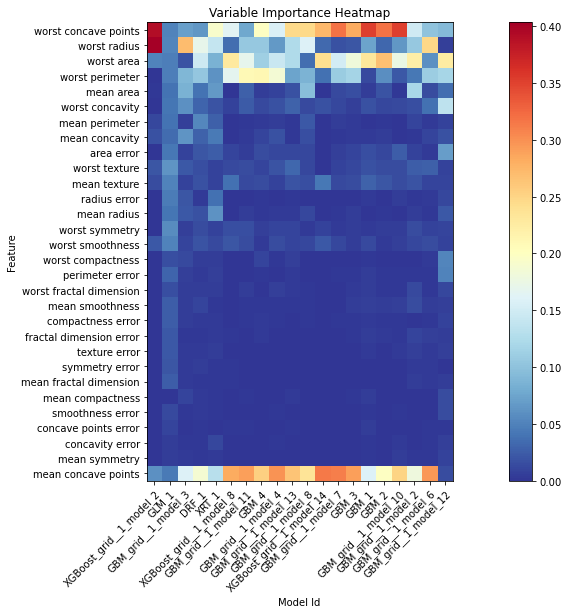

In [42]:
h2o_aml.varimp_heatmap();

## 32. Get model correlations
The `correlation of predictions` from various models on validation data can be plotted.

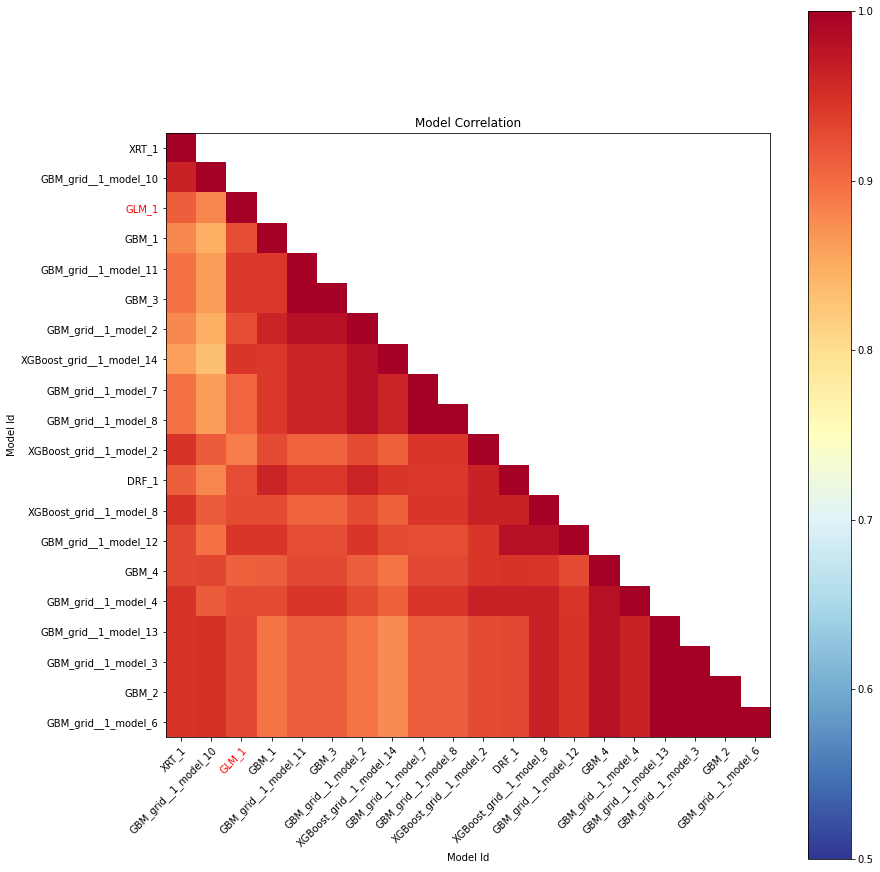

In [43]:
h2o_aml.model_correlation_heatmap(h2o_valid);

## 33. Get SHAP Summary
The `SHAP contribution` of each feature over all observations of validation data from a single model can be plotted.   
***P.S.*** *Only tree-based models are supported.*

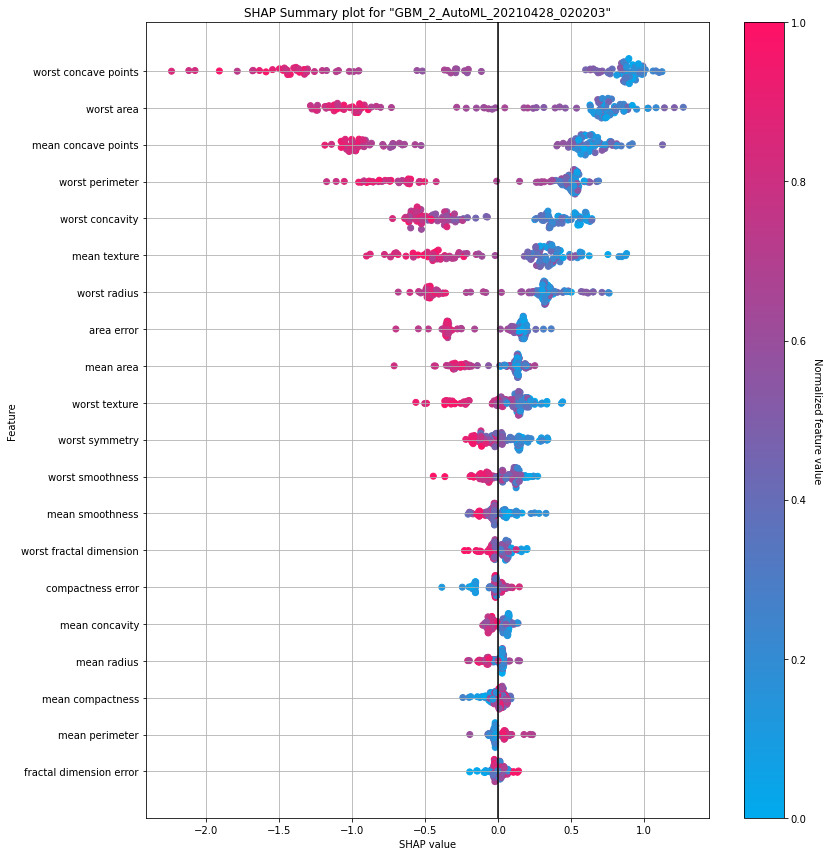

In [44]:
best_tree_model_id = [x for x in h2o_aml.leaderboard.as_data_frame().model_id if 'GBM' in x or 'XGBoost' in x or 'XRT' in x][0]
best_tree_model = h2o.get_model(best_tree_model_id)
best_tree_model.shap_summary_plot(h2o_valid);

## 34. Get SHAP for an observation
The `SHAP contribution` of each feature for a particular `observation` of validation data from a single model can be plotted.   
***P.S.*** *Only XGBoost and GBM are supported.*

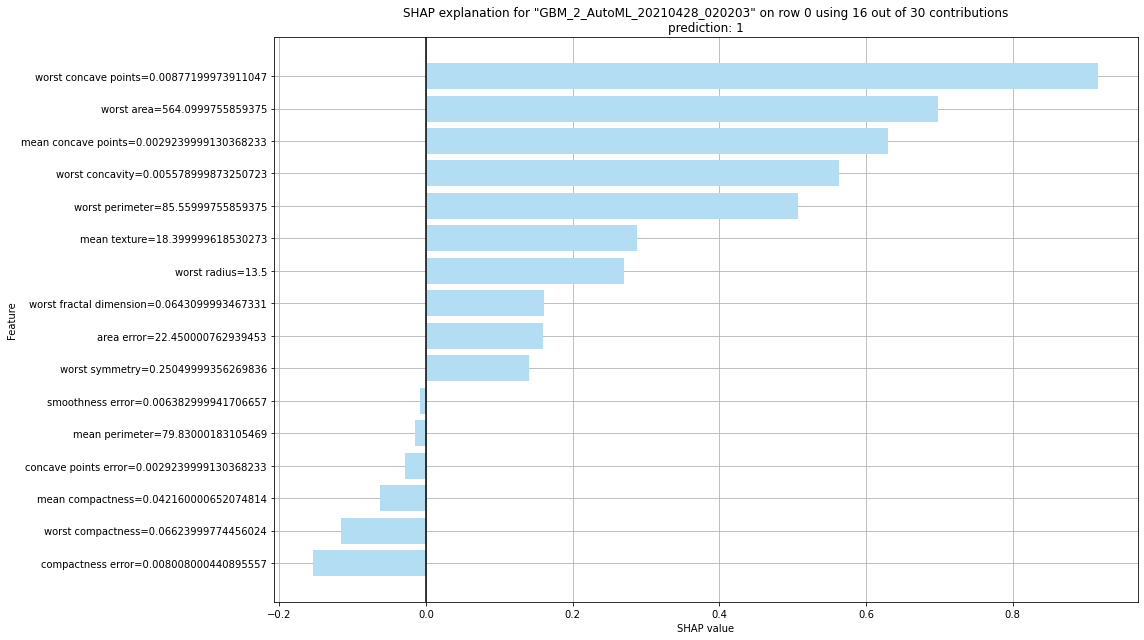

In [45]:
best_tree_model.shap_explain_row_plot(h2o_valid, row_index=0);

## 35. Get Partial Dependency Plots (PDP)
The `Partial Dependency Plots (PDP)` of each feature can be generated for all models, for each model as well as for each model and observation.

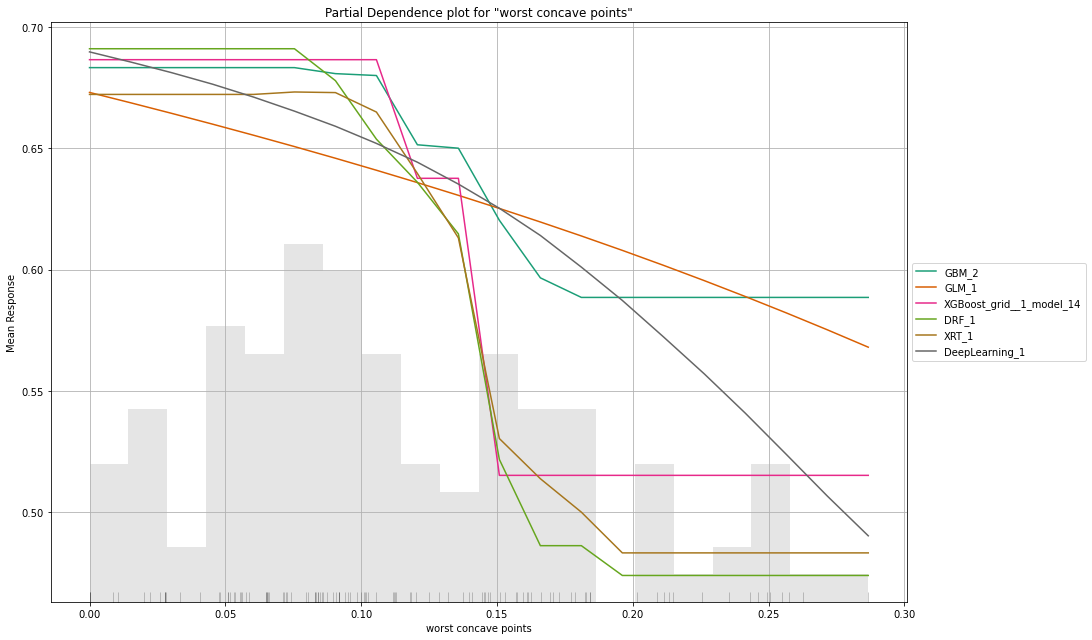

In [46]:
# pdp all models
h2o_aml.pd_multi_plot(h2o_valid, column='worst concave points');

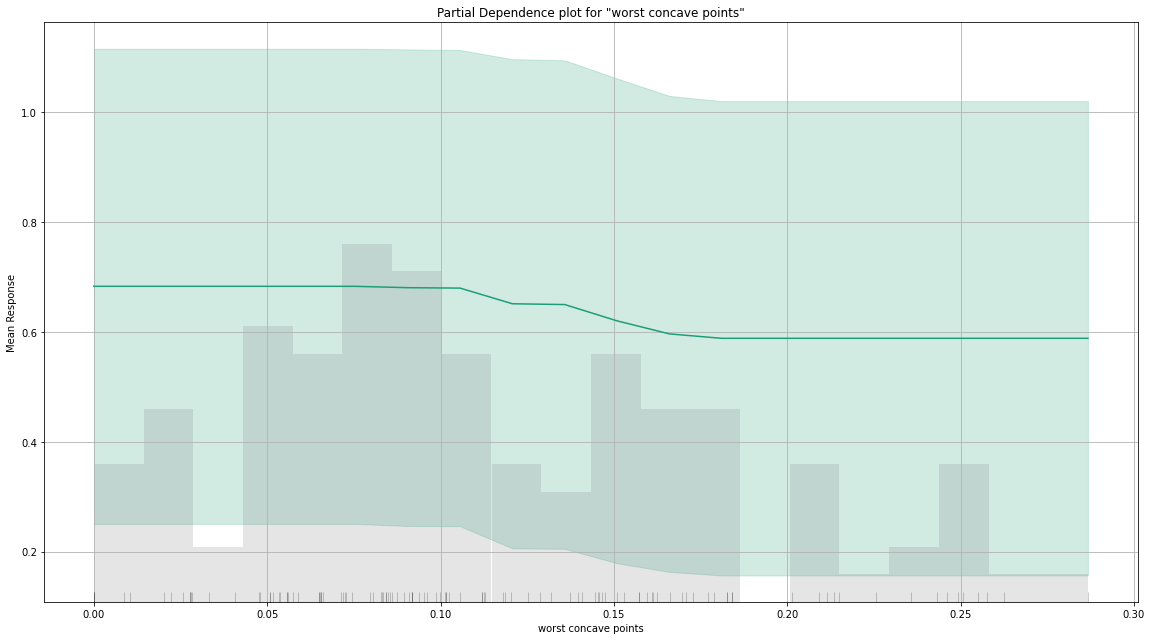

In [47]:
# pdp single model
h2o_aml.leader.pd_plot(h2o_valid, column='worst concave points');

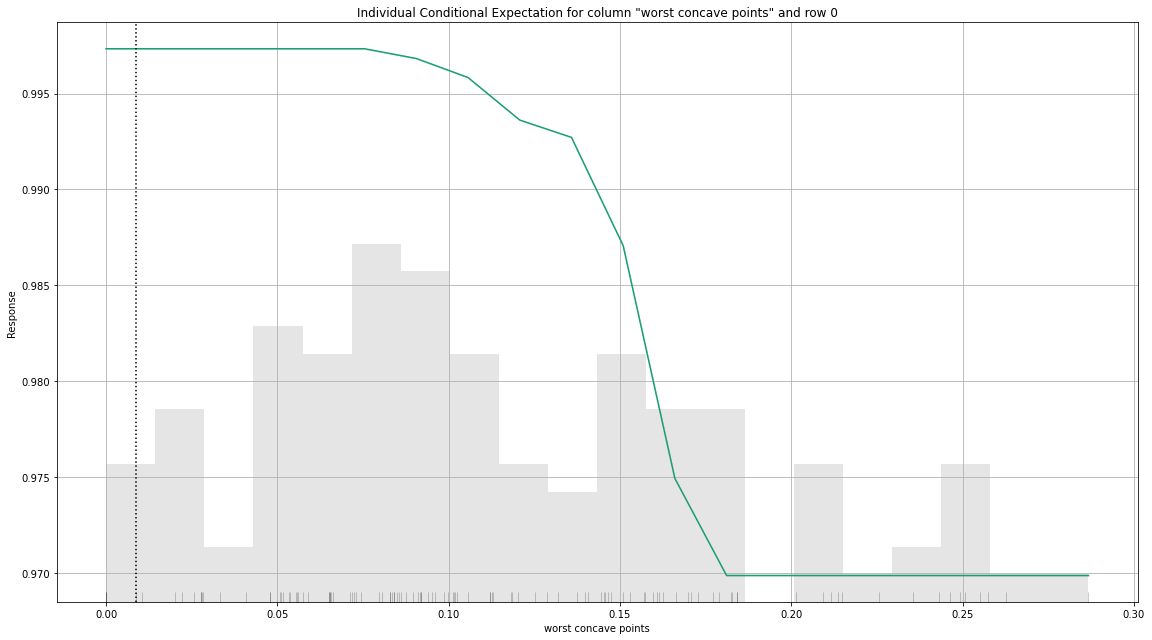

In [48]:
# pdp single model and single observation
h2o_aml.leader.pd_plot(h2o_valid, column='worst concave points', row_index=0);

## 36. Get Individual Conditional Expectation plots (ICE)
The `Individual Conditional Expectation (ICE)` plots of each model can be generated.

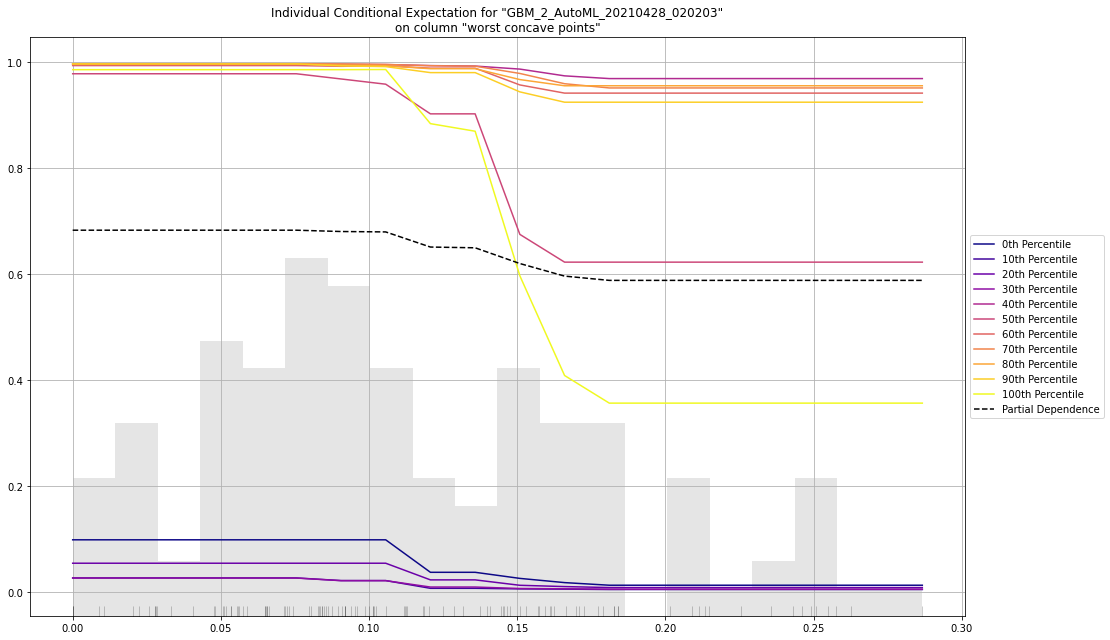

In [49]:
h2o_aml.leader.ice_plot(h2o_valid, column='worst concave points');

## 37. Explain a model
All the above interpretability features can be generated together.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_2_AutoML_20210428_020203,1,0.0928503,1,0,0.16564,0.0274365,867,0.489119,GBM
GBM_grid__1_AutoML_20210428_020203_model_3,1,0.112041,1,0,0.193428,0.0374142,584,0.44727,GBM
GBM_grid__1_AutoML_20210428_020203_model_12,1,0.173025,1,0,0.244735,0.0598952,660,0.465086,GBM
GLM_1_AutoML_20210428_020203,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138,1035,0.431613,GLM
GBM_grid__1_AutoML_20210428_020203_model_6,0.998051,0.105159,0.998653,0.0263158,0.17689,0.03129,450,0.462567,GBM
GBM_grid__1_AutoML_20210428_020203_model_10,0.998051,0.145407,0.998653,0.0263158,0.217396,0.0472608,523,0.451991,GBM
GBM_1_AutoML_20210428_020203,0.998051,0.106797,0.998653,0.0263158,0.18454,0.0340549,1680,0.446333,GBM
GBM_grid__1_AutoML_20210428_020203_model_4,0.996101,0.135556,0.997255,0.0263158,0.20543,0.0422013,490,0.450694,GBM
GBM_grid__1_AutoML_20210428_020203_model_8,0.996101,0.139927,0.997255,0.0263158,0.205286,0.0421422,459,0.435747,GBM
XGBoost_grid__1_AutoML_20210428_020203_model_14,0.996101,0.166826,0.997255,0.0263158,0.219894,0.0483533,272,0.403252,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

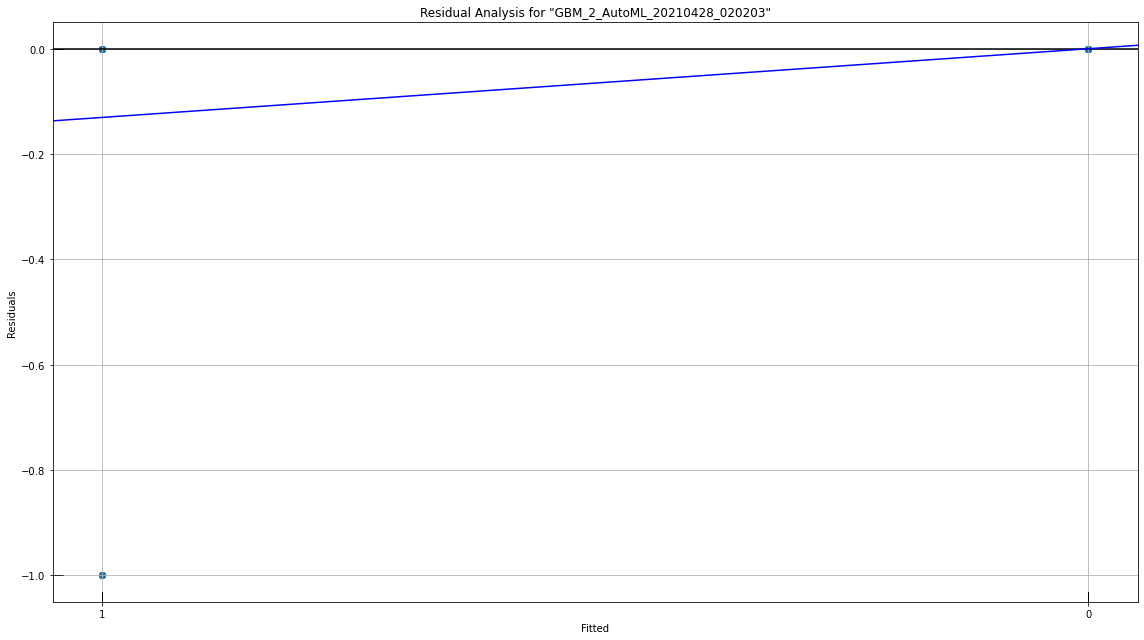

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

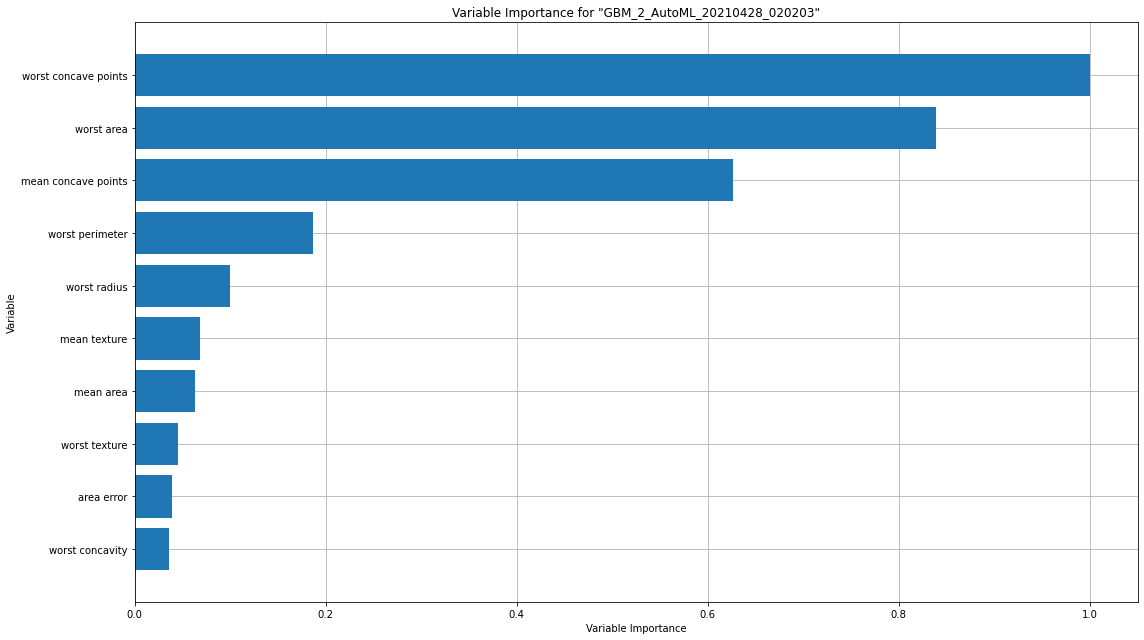

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

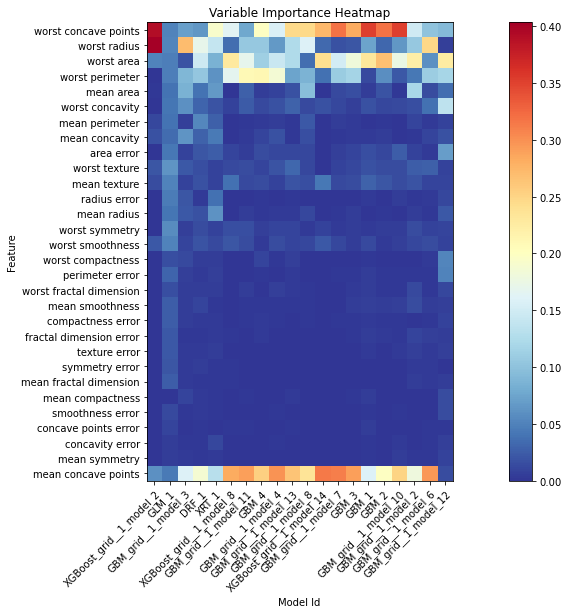

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

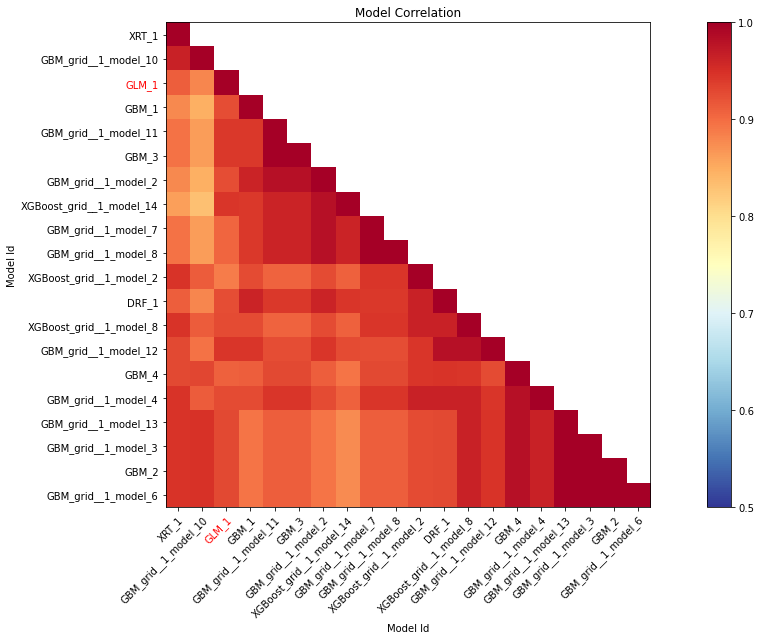

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

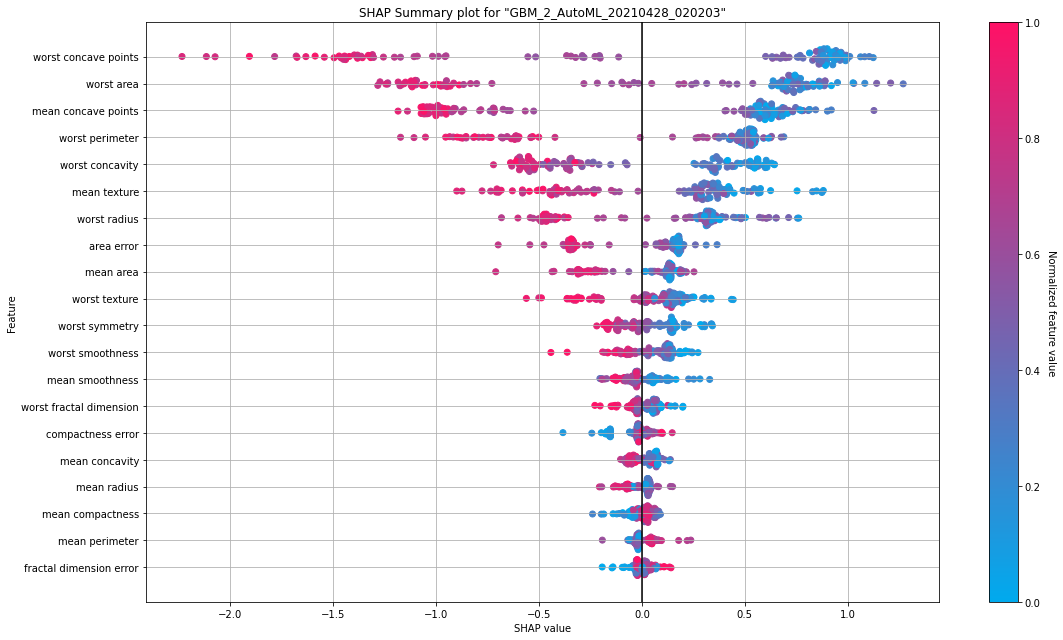

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

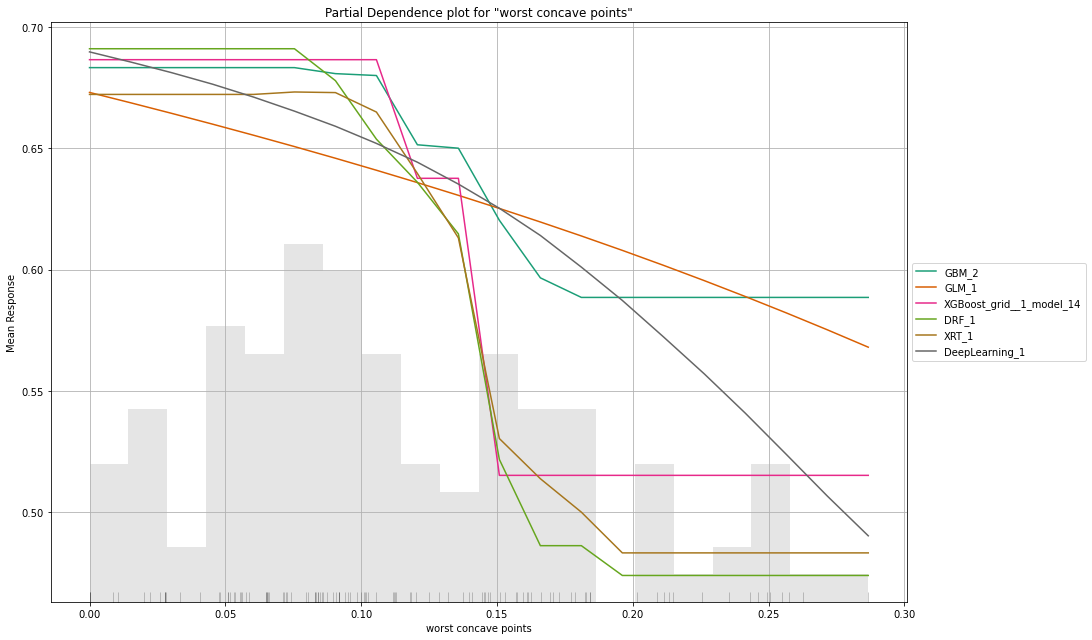

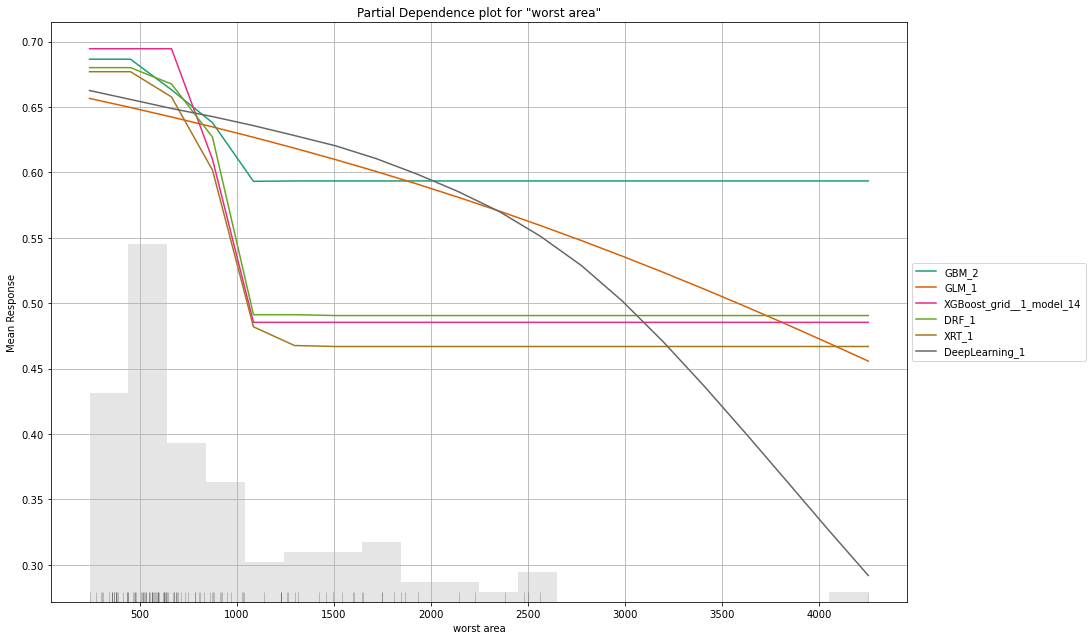

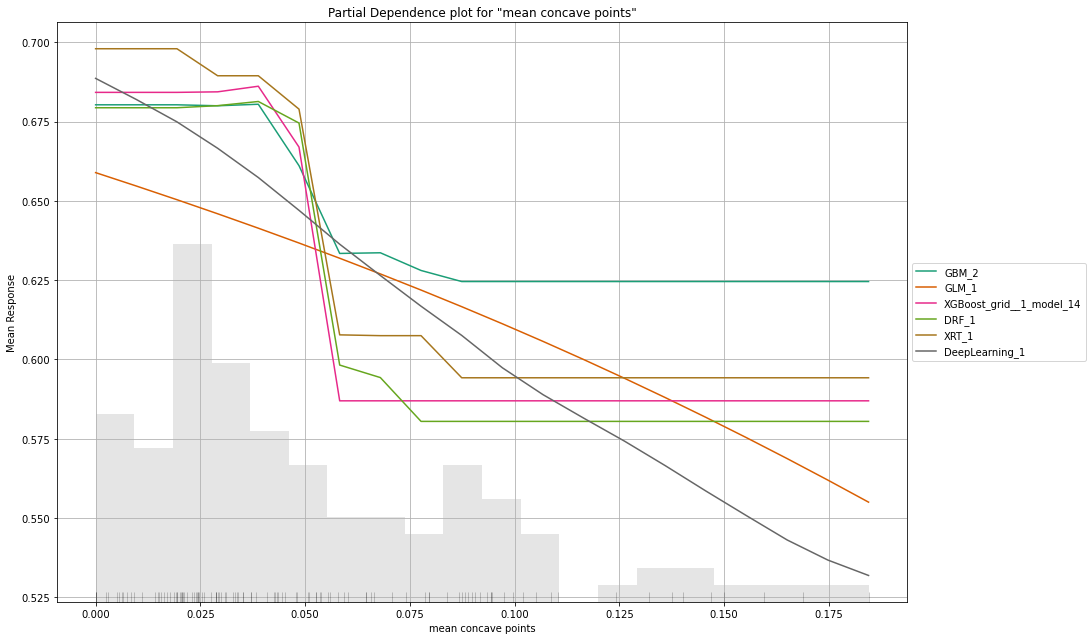

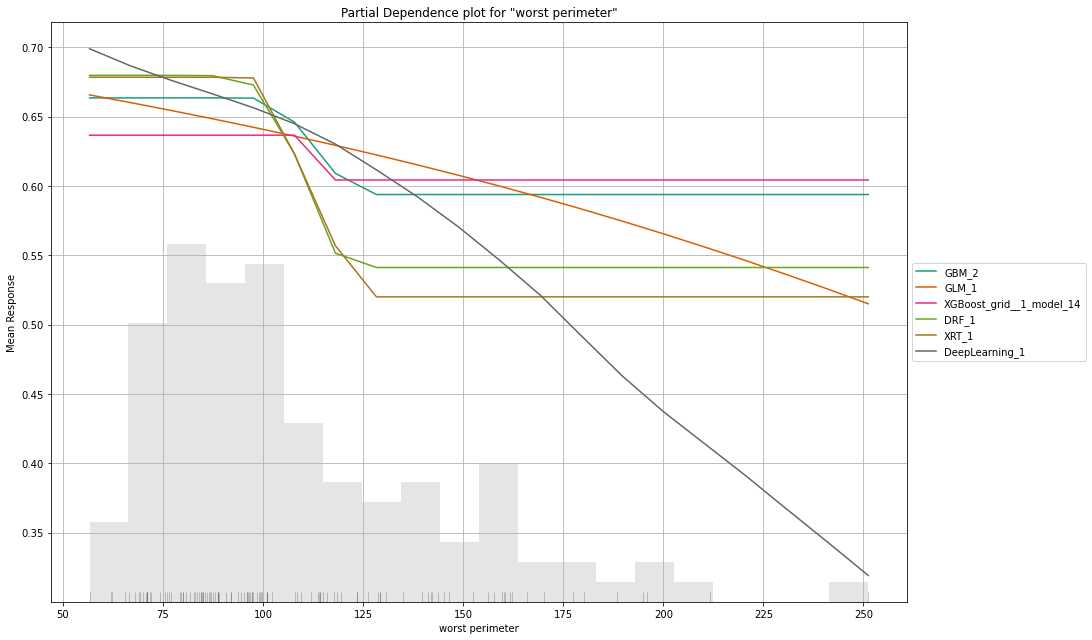

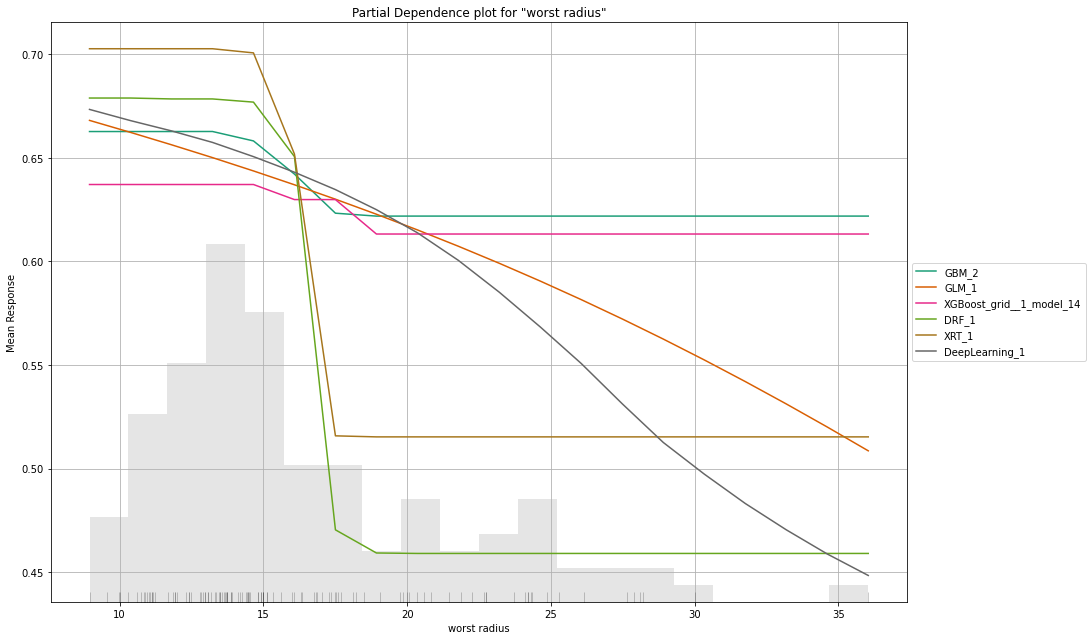

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

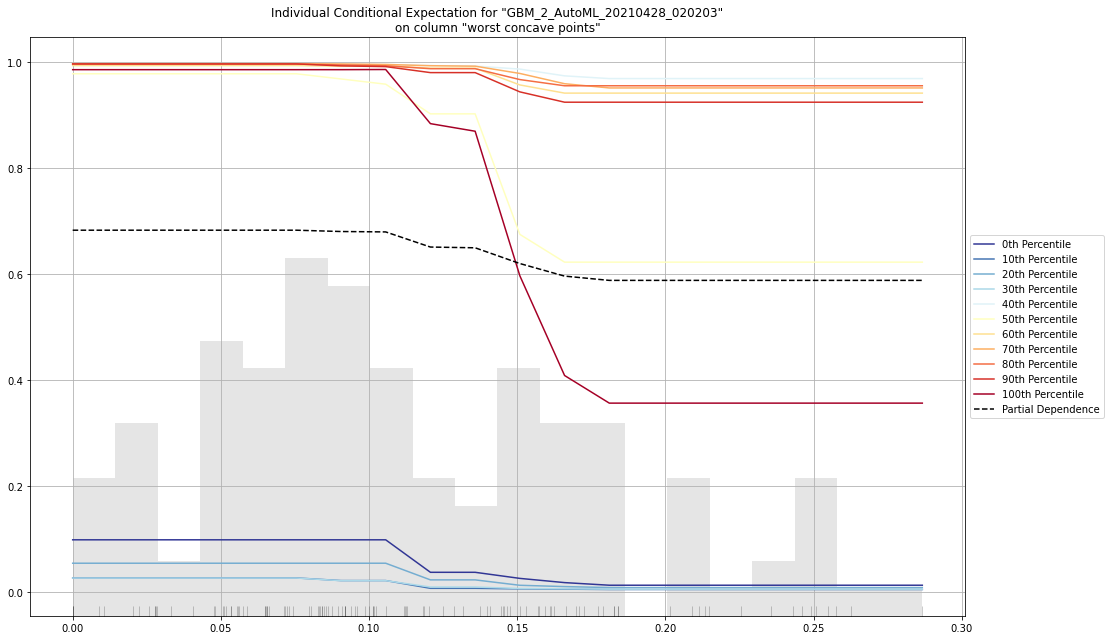

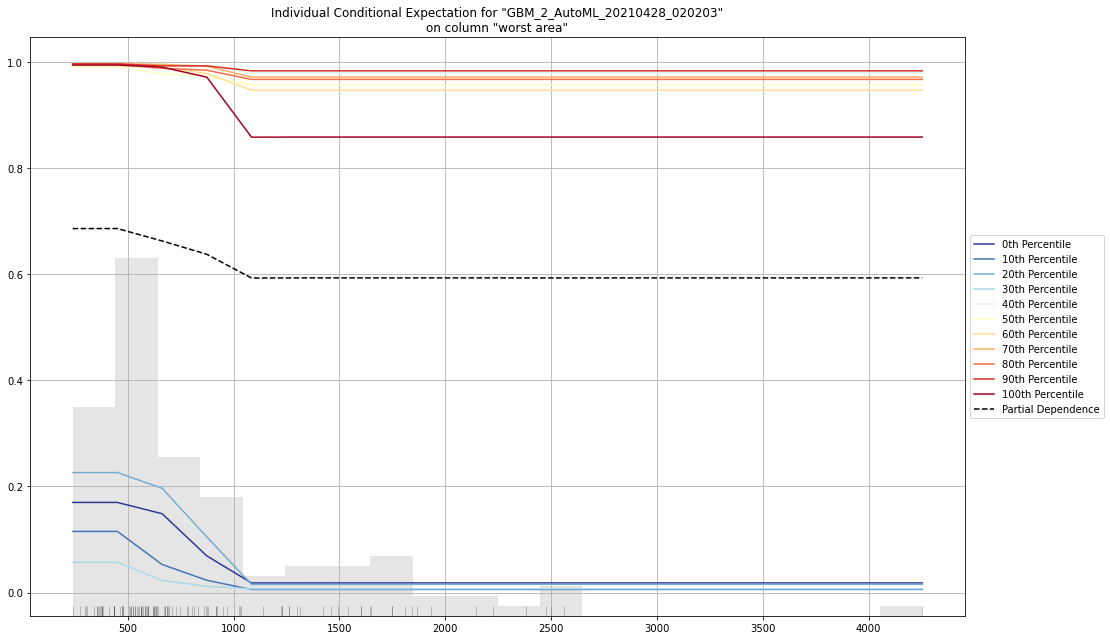

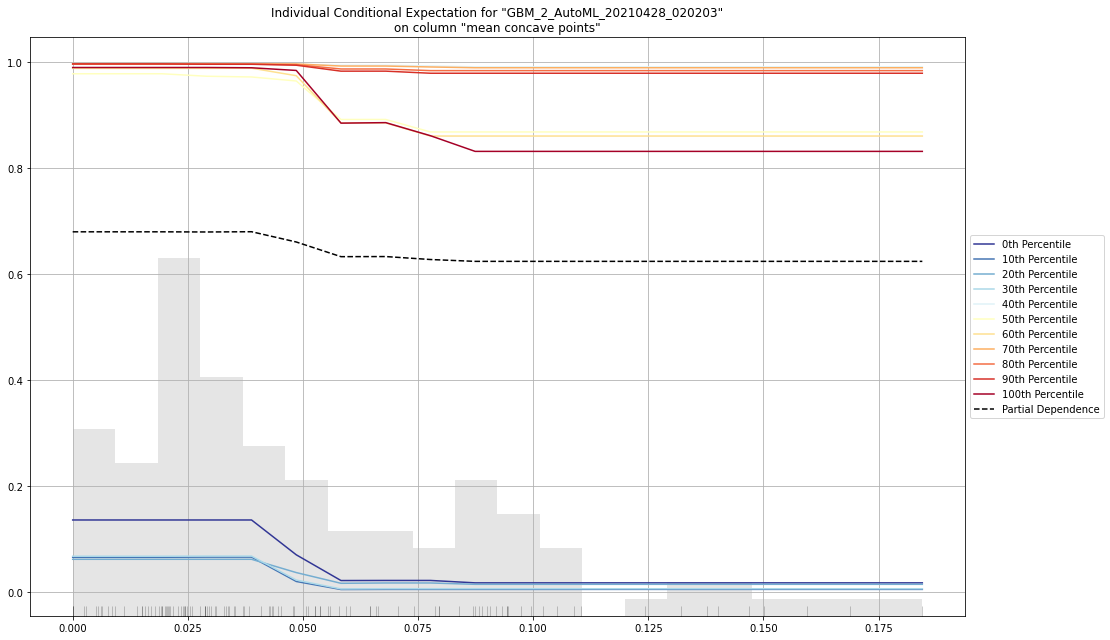

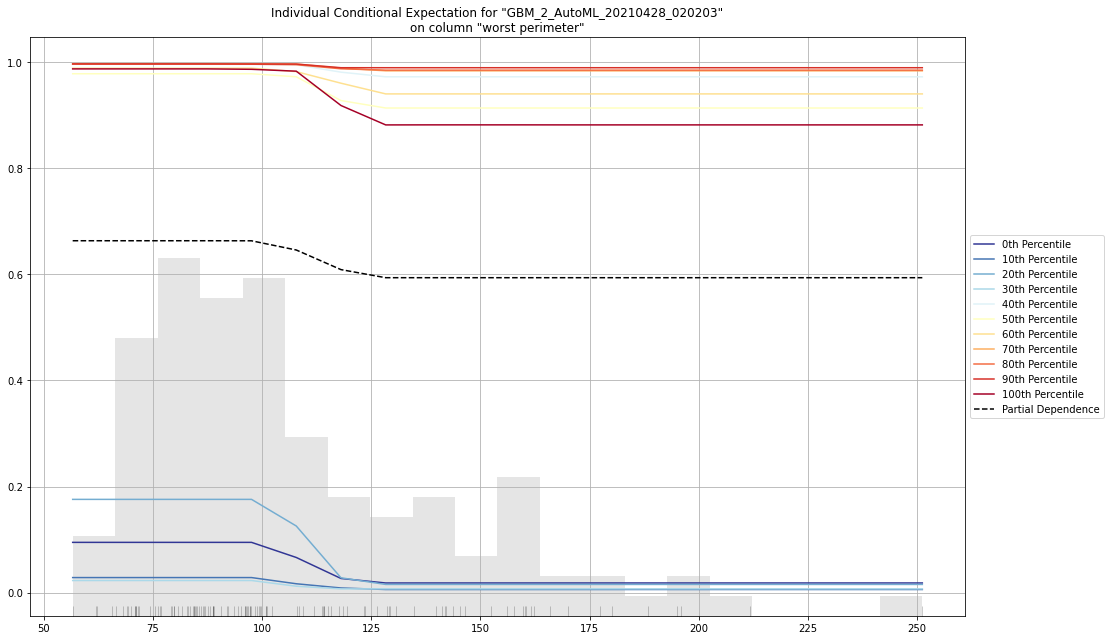

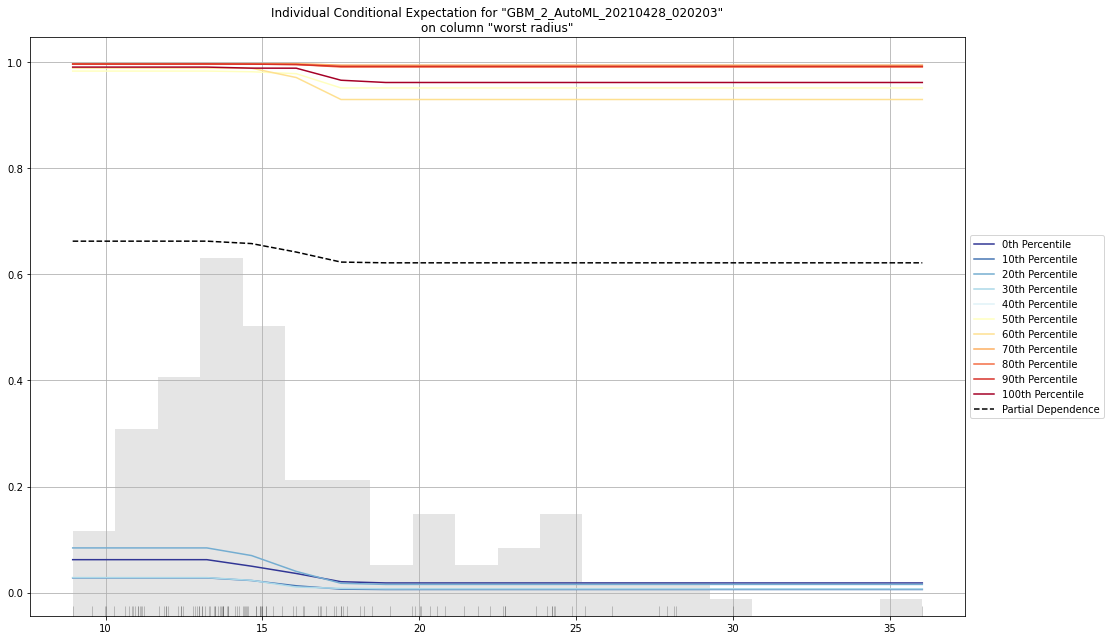

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_2_AutoML_20210428_020203,1,0.0928503,1,0,0.16564,0.0274365,867,0.489119,GBM
GBM_grid__1_AutoML_20210428_020203_model_3,1,0.112041,1,0,0.193428,0.0374142,584,0.44727,GBM
GBM_grid__1_AutoML_20210428_020203_model_12,1,0.173025,1,0,0.244735,0.0598952,660,0.465086,GBM
GLM_1_AutoML_20210428_020203,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138,1035,0.431613,GLM
GBM_grid__1_AutoML_20210428_020203_model_6,0.998051,0.105159,0.998653,0.0263158,0.17689,0.03129,450,0.462567,GBM
GBM_grid__1_AutoML_20210428_020203_model_10,0.998051,0.145407,0.998653,0.0263158,0.217396,0.0472608,523,0.451991,GBM
GBM_1_AutoML_20210428_020203,0.998051,0.106797,0.998653,0.0263158,0.18454,0.0340549,1680,0.446333,GBM
GBM_grid__1_AutoML_20210428_020203_model_4,0.996101,0.135556,0.997255,0.0263158,0.20543,0.0422013,490,0.450694,GBM
GBM_grid__1_AutoML_20210428_020203_model_8,0.996101,0.139927,0.997255,0.0263158,0.205286,0.0421422,459,0.435747,GBM
XGBoost_grid__1_AutoML_20210428_020203_model_14,0.996101,0.166826,0.997255,0.0263158,0.219894,0.0483533,272,0.403252,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

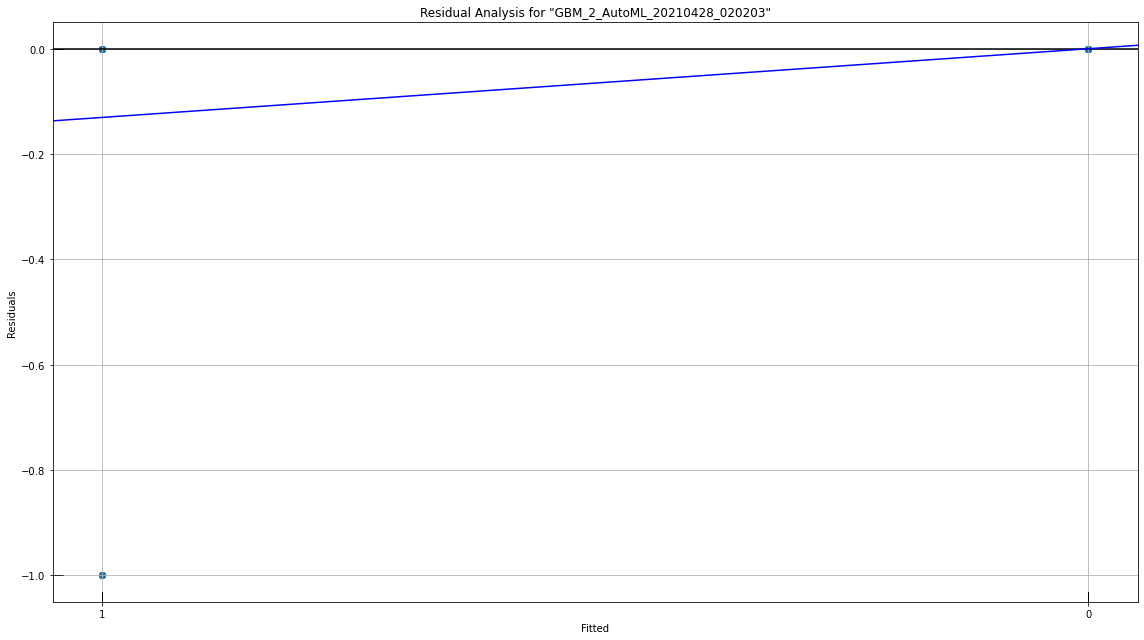

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

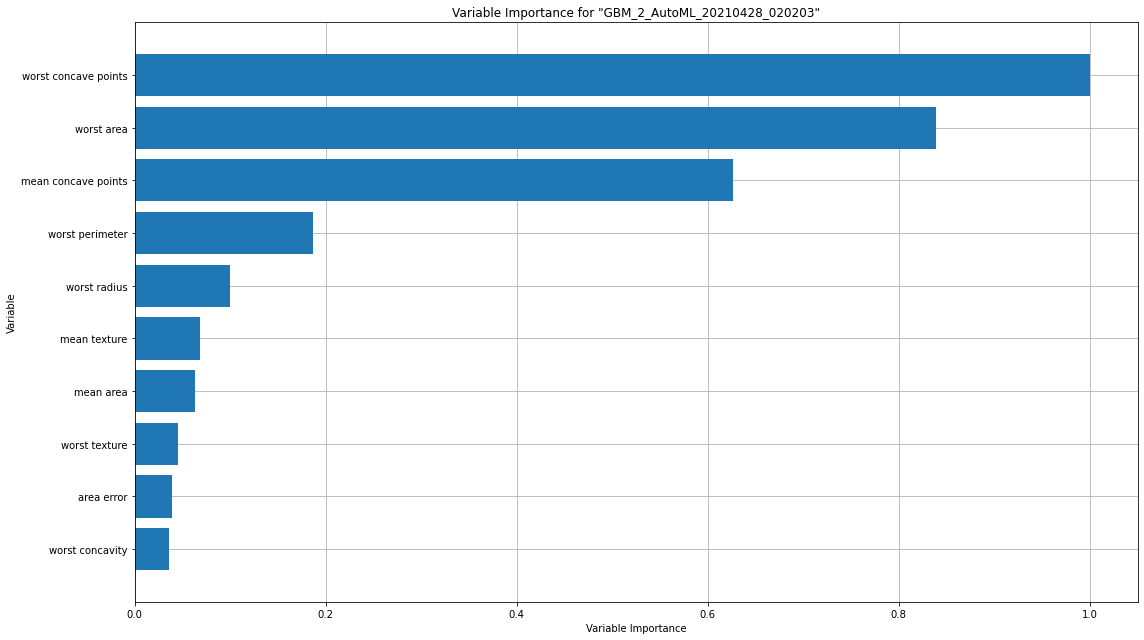

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

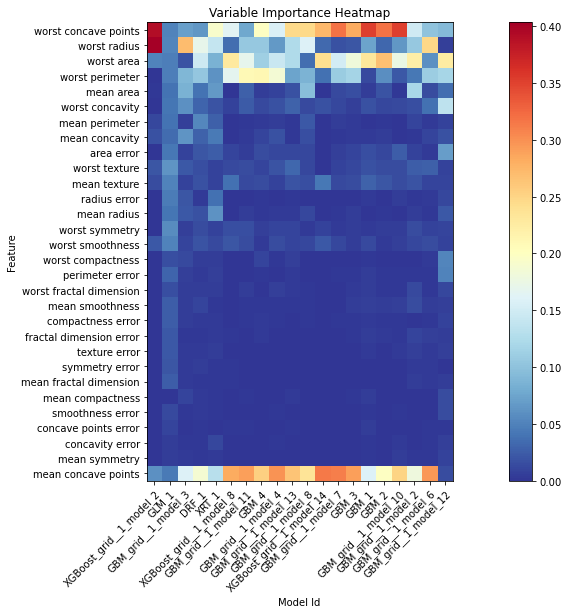

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

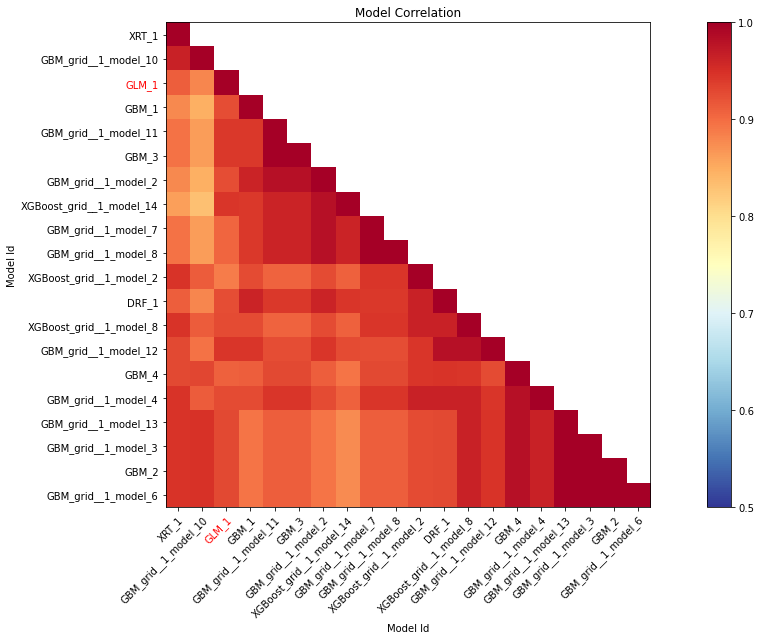

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

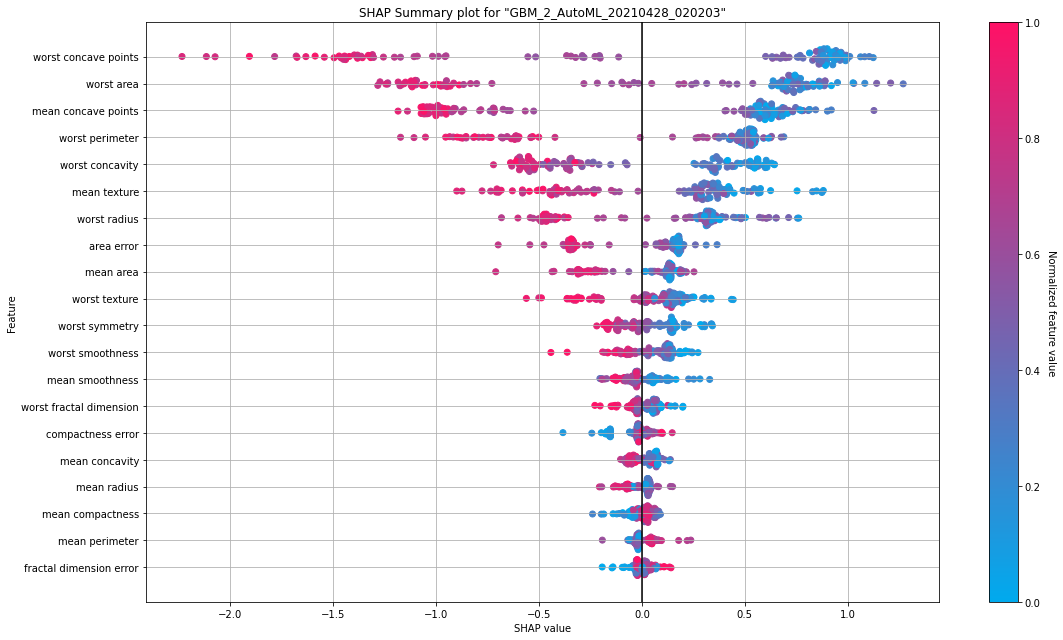

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

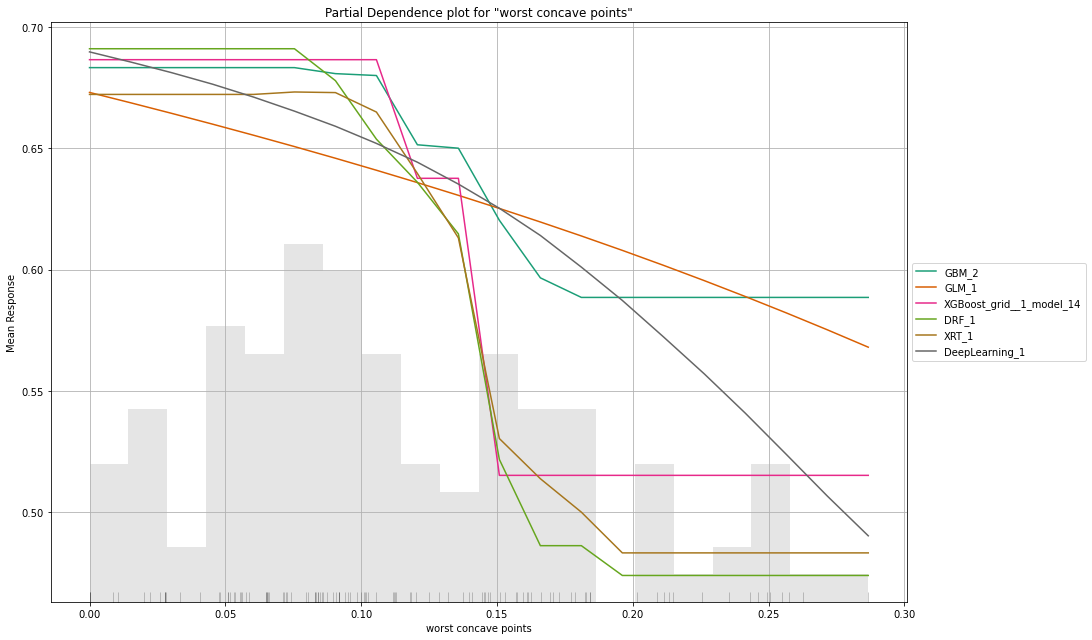

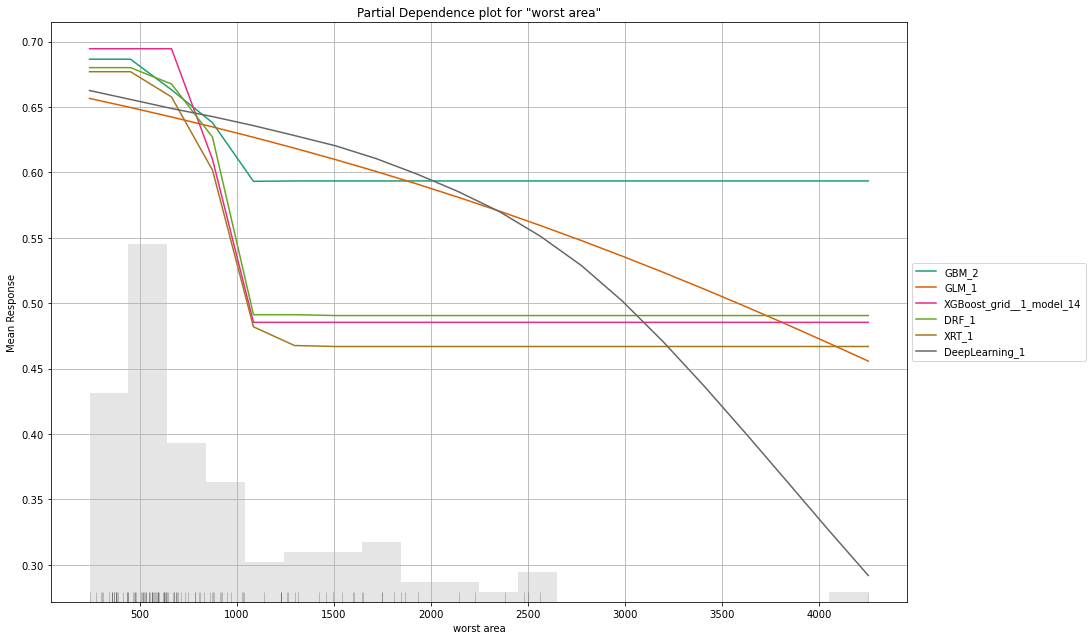

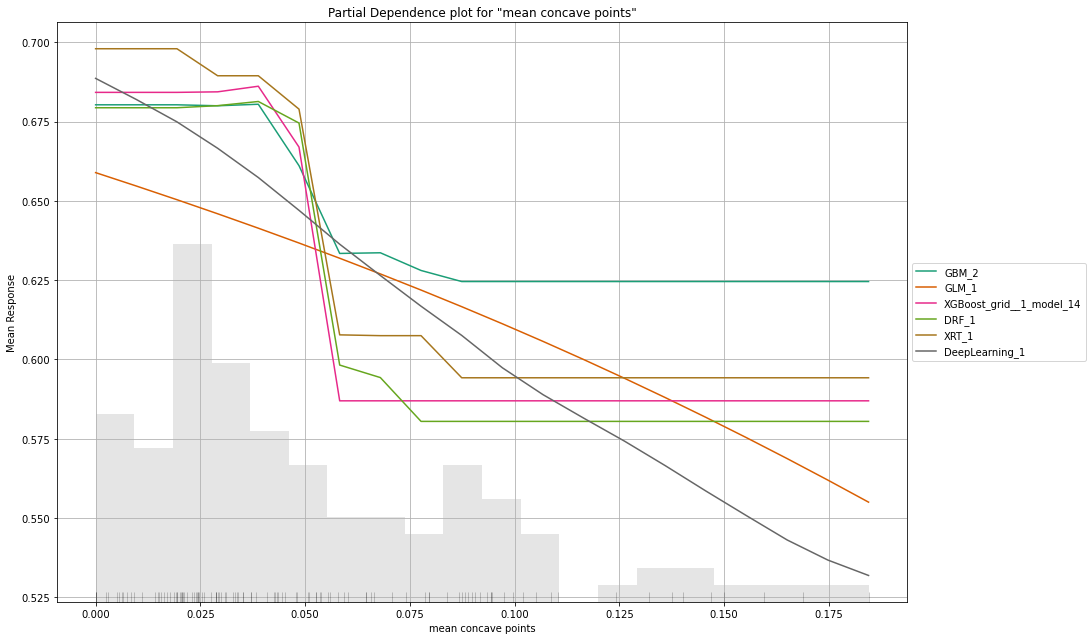

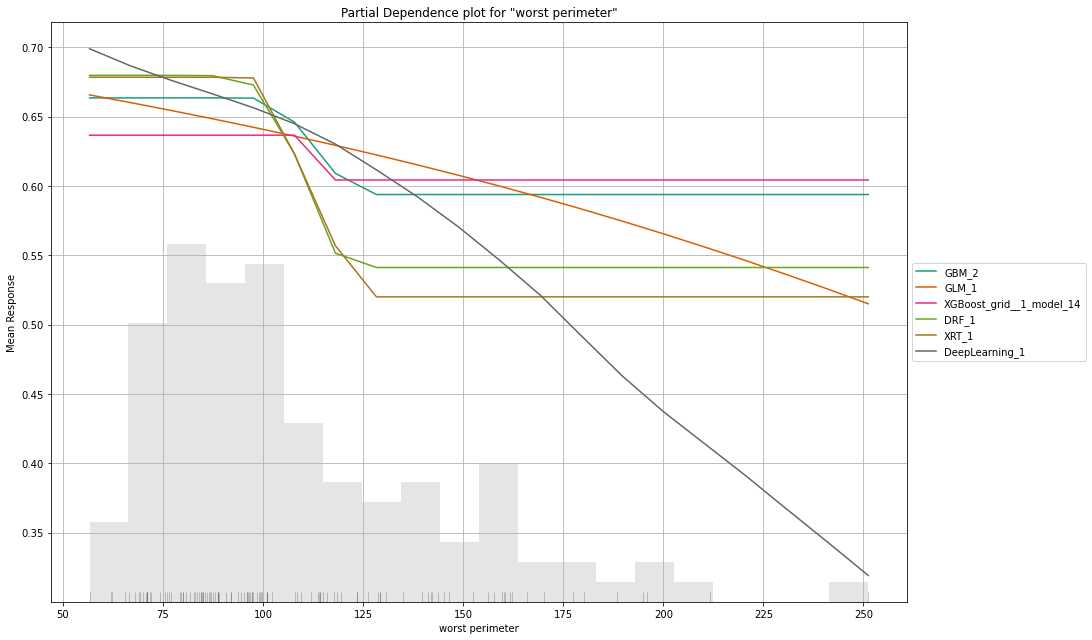

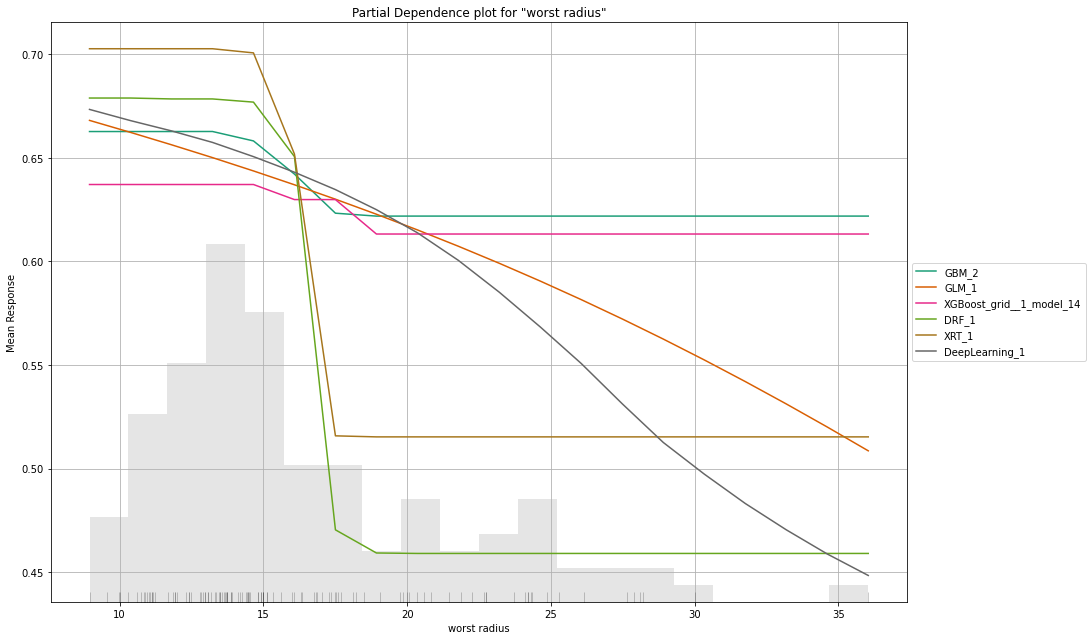

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

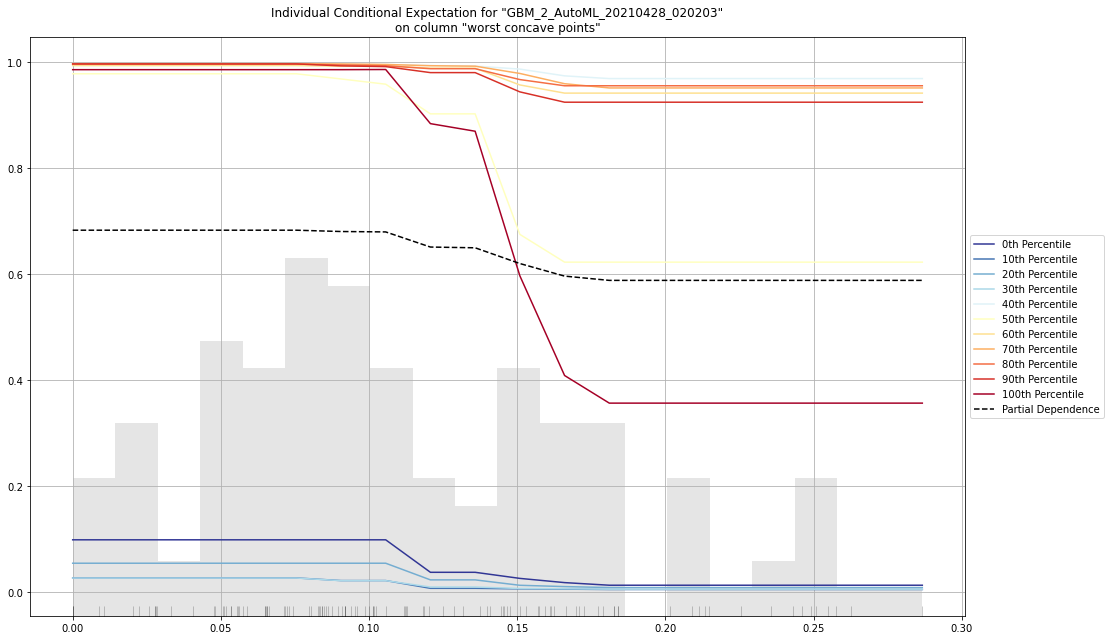

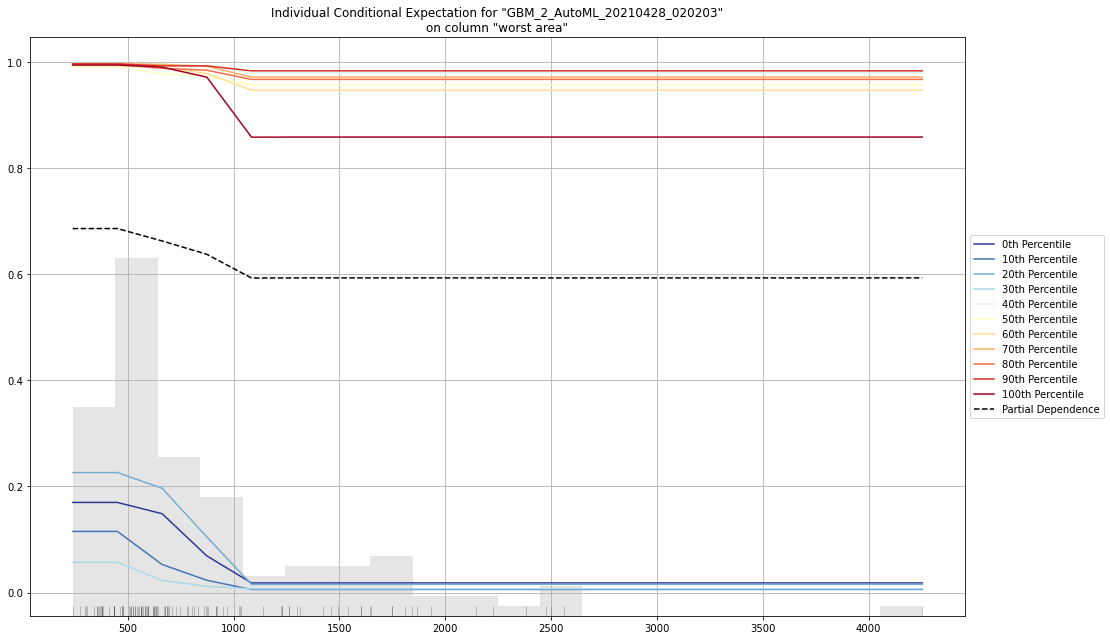

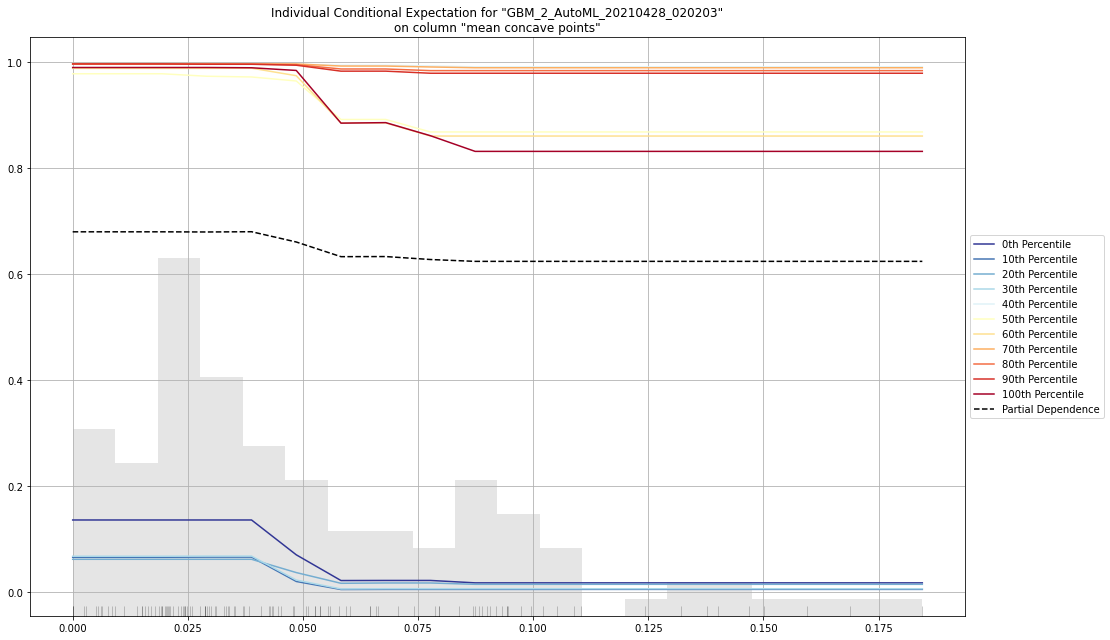

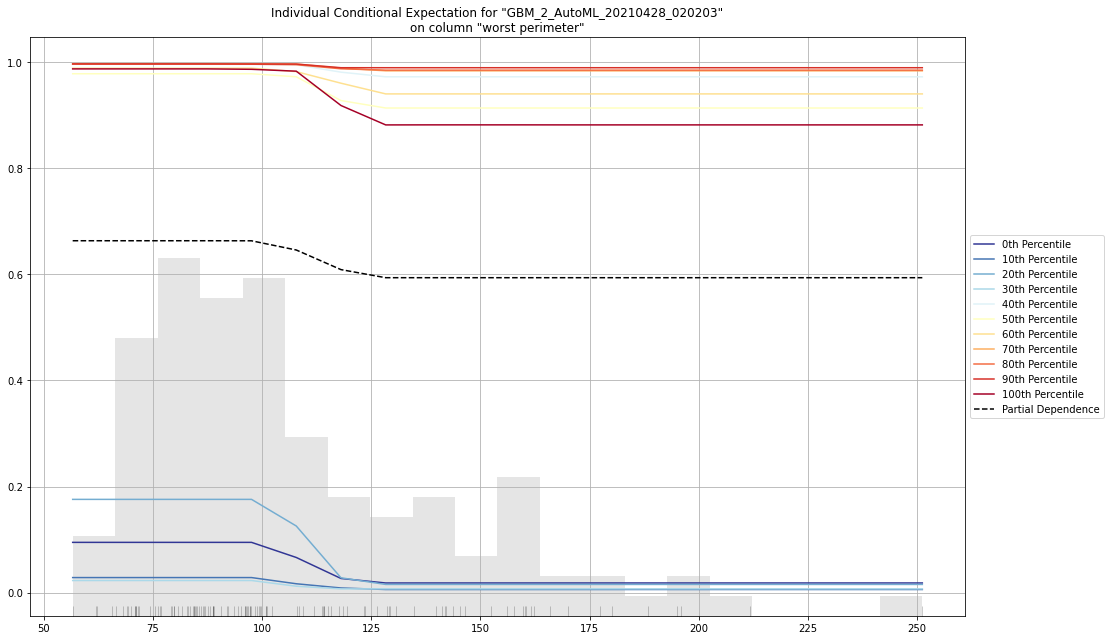

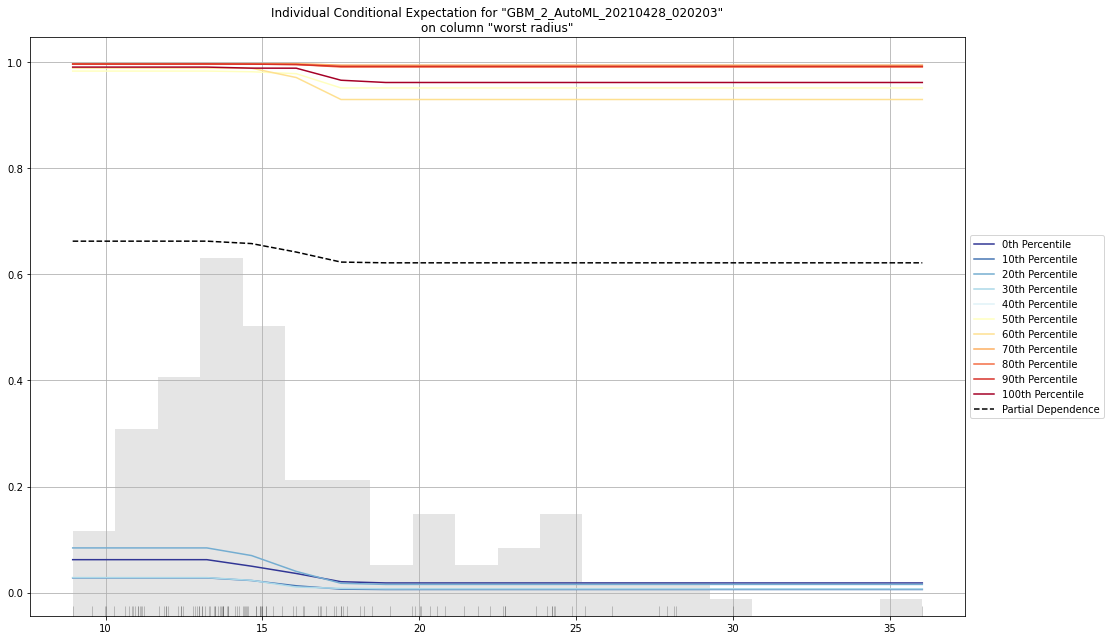

In [50]:
h2o.explain(h2o_aml, h2o_valid)

## 38. Save model as binary
An H2O model can be saved as a `binary` artifact.

In [ ]:
PATH_OUTPUT = '.'
h2o.save_model(h2o_aml.leader, path = PATH_OUTPUT)

## 39. Save model as mojo
An H2O model can be saved as a `mojo` artifact which is recommended for production.

In [ ]:
PATH_OUTPUT = './'
h2o_aml.leader.download_mojo(path = PATH_OUTPUT)

## 40. Check logs
The logs of H2OAutoML can be extracted using `event_log`.

In [53]:
h2o_aml.event_log.head(rows=h2o_aml.event_log.nrows)

timestamp,level,stage,message,name,value
02:02:03.994,Info,Workflow,Project: AutoML_20210428_20203993,,
02:02:03.995,Info,Validation,Cross-validation disabled by user: no fold column nor nfolds > 1.,,
02:02:03.996,Info,Validation,Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954,,
02:02:03.996,Info,Validation,Build control seed: -1 (random),,
02:02:03.996,Info,DataImport,"Since cross-validation is disabled, and none of validation frame and leaderboard frame were provided, automatically split the training data into training, validation and leaderboard frames in the ratio 80/10/10",,
02:02:04.20,Info,DataImport,training frame: Frame key: automl_training_py_1197_sid_a147 cols: 31 rows: 366 chunks: 1 size: 90548 checksum: 7196620539661792940,,
02:02:04.29,Info,DataImport,validation frame: Frame key: automl_validation_py_1197_sid_a147 cols: 31 rows: 43 chunks: 1 size: 12988 checksum: -7324433221640276926,,
02:02:04.32,Info,DataImport,leaderboard frame: Frame key: automl_leaderboard_py_1197_sid_a147 cols: 31 rows: 46 chunks: 1 size: 13708 checksum: -1689355368270709610,,
02:02:04.32,Info,DataImport,blending frame: NULL,,
02:02:04.32,Info,DataImport,response column: target,,


## 41. Don't stop learning
Here are some useful resources to explore and learn more:

* [Implementation on Kaggle TPS (January 2021) competition (Regression)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-january-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (February 2021) competition (Regression)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-february-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (March 2021) competition (Binary Classification)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-march-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (April 2021) competition (Binary Classification)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-april-2021#H2O-AutoML)


* [Product Website](https://www.h2o.ai/products/h2o-automl)
* [Source Code](https://github.com/h2oai/h2o-3)
* [Documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)